In [216]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [217]:
# Load results
results_files = glob.glob('results/*.csv')

# Get everything in the string after the first _
#results_ids = [f.split('_')[1:] for f in results_files]

In [218]:
# Loop through results files and combine them into a single dataframe
results = pd.DataFrame()
for f in results_files:
    results = results.append(pd.read_csv(f))

# Manually fix the colors for models for all plots
# "Ours" should be orange, "Euclidean" should be green, and "Entire" should be blue
colors = {'Ours': 'orange', 'Euclidean': 'green', 'Entire': 'blue'}

In [219]:
# Let's define a metric to normalize the accuracy of each model by its computational cost
# This should be the rmse divided by the time
results['GP_Entire_RMSEnorm'] = results['GP_Entire_RMSE'] * results['GP_Entire_Time']
results['GP_Cluster_RMSEnorm'] = results['GP_Cluster_RMSE_Avg'] * results['GP_Cluster_Time_Avg']
results['GP_Euc_RMSEnorm'] = results['GP_Euc_RMSE_Avg'] * results['GP_Euc_Time_Avg']

results['RF_Entire_RMSEnorm'] = results['RF_Entire_RMSE'] * results['RF_Entire_Time']
results['RF_Cluster_RMSEnorm'] = results['RF_Cluster_RMSE_Avg'] * results['RF_Cluster_Time_Avg']
results['RF_Euc_RMSEnorm'] = results['RF_Euc_RMSE_Avg'] * results['RF_Euc_Time_Avg']

results['NN_Entire_RMSEnorm'] = results['NN_Entire_RMSE'] * results['NN_Entire_Time']
results['NN_Cluster_RMSEnorm'] = results['NN_Cluster_RMSE_Avg'] * results['NN_Cluster_Time_Avg']
results['NN_Euc_RMSEnorm'] = results['NN_Euc_RMSE_Avg'] * results['NN_Euc_Time_Avg']

results['LR_Entire_RMSEnorm'] = results['LR_Entire_RMSE'] * results['LR_Entire_Time']
results['LR_Cluster_RMSEnorm'] = results['LR_Cluster_RMSE_Avg'] * results['LR_Cluster_Time_Avg']
results['LR_Euc_RMSEnorm'] = results['LR_Euc_RMSE_Avg'] * results['LR_Euc_Time_Avg']

results['GB_Entire_RMSEnorm'] = results['GB_Entire_RMSE'] * results['GB_Entire_Time']
results['GB_Cluster_RMSEnorm'] = results['GB_Cluster_RMSE_Avg'] * results['GB_Cluster_Time_Avg']
results['GB_Euc_RMSEnorm'] = results['GB_Euc_RMSE_Avg'] * results['GB_Euc_Time_Avg']

In [220]:
melted_df = pd.melt(results, id_vars=['N', 'Norm', 'Lambda', 'Gamma', 'K'], var_name='Metric')
melted_df['Model'] = melted_df['Metric'].str.split('_').str[0]
melted_df['Sample'] = melted_df['Metric'].str.split('_').str[1]
# Adjust 'metric' column by removing the model and sample
melted_df['Metric'] = melted_df['Metric'].str.split('_').str[2]

# In 'Sample', change 'Euc' to 'Euclidean' and 'Cluster' to 'Ours'
melted_df['Sample'] = melted_df['Sample'].replace({'Euc': 'Euclidean', 'Cluster': 'Ours'})
melted_df

N  Norm  Lambda  Gamma  K    Metric     value Model     Sample
0      50000     1     0.5    0.5  4      Time  0.003192    LR     Entire
1      10000     2     0.5    0.5  6      Time  0.000918    LR     Entire
2       5000     1     0.9    1.0  5      Time  0.000714    LR     Entire
3       1000     1     0.1    0.5  4      Time  0.000324    LR     Entire
4        100     1     0.1    1.0  7      Time  0.000386    LR     Entire
...      ...   ...     ...    ... ..       ...       ...   ...        ...
47245  10000     2     0.1    1.0  6  RMSEnorm  0.033688    GB  Euclidean
47246    100     1     0.5    0.5  7  RMSEnorm  0.047187    GB  Euclidean
47247  10000     1     0.1    1.0  3  RMSEnorm  0.097640    GB  Euclidean
47248   1000     1     0.9    2.0  4  RMSEnorm  0.002486    GB  Euclidean
47249    500     2     0.5    0.5  7  RMSEnorm  0.003765    GB  Euclidean

[47250 rows x 9 columns]

In [221]:
melted_df['Sample'].value_counts()

Entire       15750
Ours         15750
Euclidean    15750
Name: Sample, dtype: int64

In [222]:
melted_time_df = melted_df[melted_df['Metric'] == 'Time'].drop(columns=['Metric'])
melted_mae_df = melted_df[melted_df['Metric'] == 'MAE'].drop(columns=['Metric'])
melted_rmse_df = melted_df[melted_df['Metric'] == 'RMSE'].drop(columns=['Metric'])
melted_mad_df = melted_df[melted_df['Metric'] == 'MAD'].drop(columns=['Metric'])
melted_rmsenorm_df = melted_df[melted_df['Metric'] == 'RMSEnorm'].drop(columns=['Metric'])

melted_time_LR_df = melted_time_df[melted_time_df['Model'] == 'LR']
melted_time_RF_df = melted_time_df[melted_time_df['Model'] == 'RF']
melted_time_NN_df = melted_time_df[melted_time_df['Model'] == 'NN']
melted_time_GP_df = melted_time_df[melted_time_df['Model'] == 'GP']
melted_time_GB_df = melted_time_df[melted_time_df['Model'] == 'GB']

melted_rmse_LR_df = melted_rmse_df[melted_rmse_df['Model'] == 'LR']
melted_rmse_RF_df = melted_rmse_df[melted_rmse_df['Model'] == 'RF']
melted_rmse_NN_df = melted_rmse_df[melted_rmse_df['Model'] == 'NN']
melted_rmse_GP_df = melted_rmse_df[melted_rmse_df['Model'] == 'GP']
melted_rmse_GB_df = melted_rmse_df[melted_rmse_df['Model'] == 'GB']

melted_rmse_df_100 = melted_rmse_df[melted_rmse_df['N'] == 100]
melted_rmse_df_500 = melted_rmse_df[melted_rmse_df['N'] == 500]
melted_rmse_df_1000 = melted_rmse_df[melted_rmse_df['N'] == 1000]
melted_rmse_df_5000 = melted_rmse_df[melted_rmse_df['N'] == 5000]
melted_rmse_df_10000 = melted_rmse_df[melted_rmse_df['N'] == 10000]
melted_rmse_df_100000 = melted_rmse_df[melted_rmse_df['N'] == 100000]

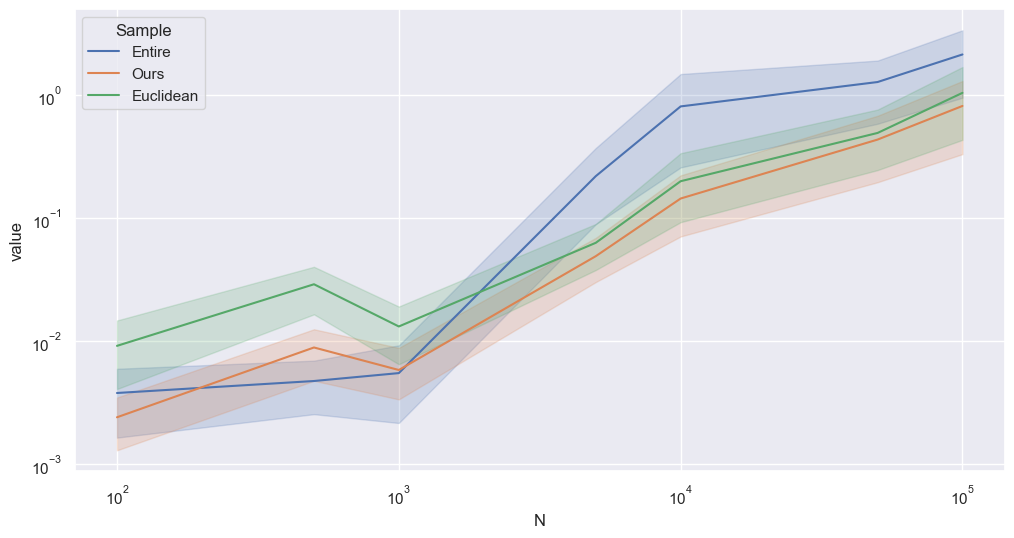

In [223]:
melted_rmsenorm_df_k3 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 3]
melted_rmsenorm_df_k3_05 = melted_rmsenorm_df_k3[melted_rmsenorm_df_k3['Lambda'] == 0.5]
melted_rmsenorm_df_k3_05_1 = melted_rmsenorm_df_k3_05[melted_rmsenorm_df_k3_05['Gamma'] == 1]

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_rmsenorm_df_k3_05_1, x='N', y='value', hue='Sample')
plt.yscale('log')
plt.xscale('log')

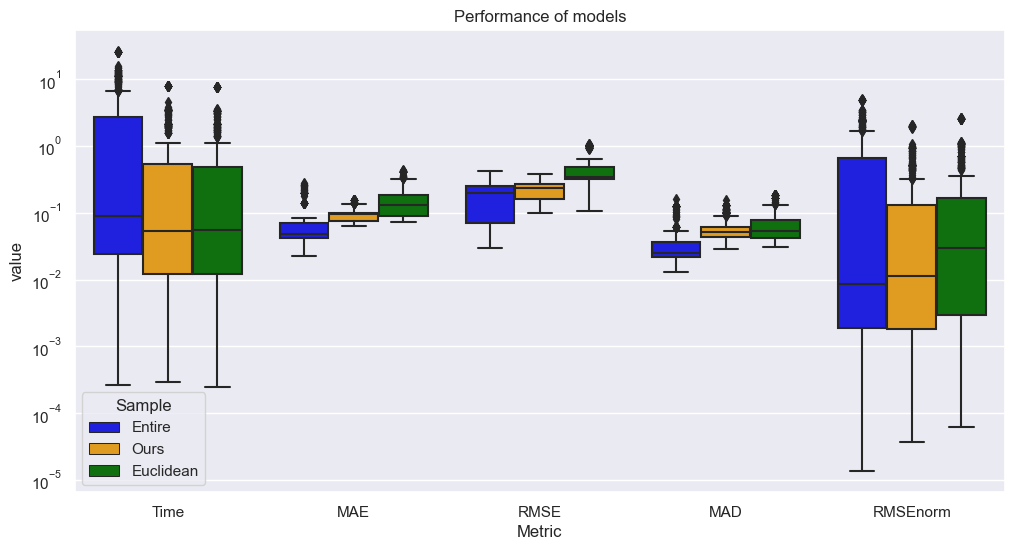

In [224]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='value', hue='Sample', data=melted_df[melted_df['K'] == 3], palette=colors)
plt.title('Performance of models')
plt.yscale('log')
plt.show()

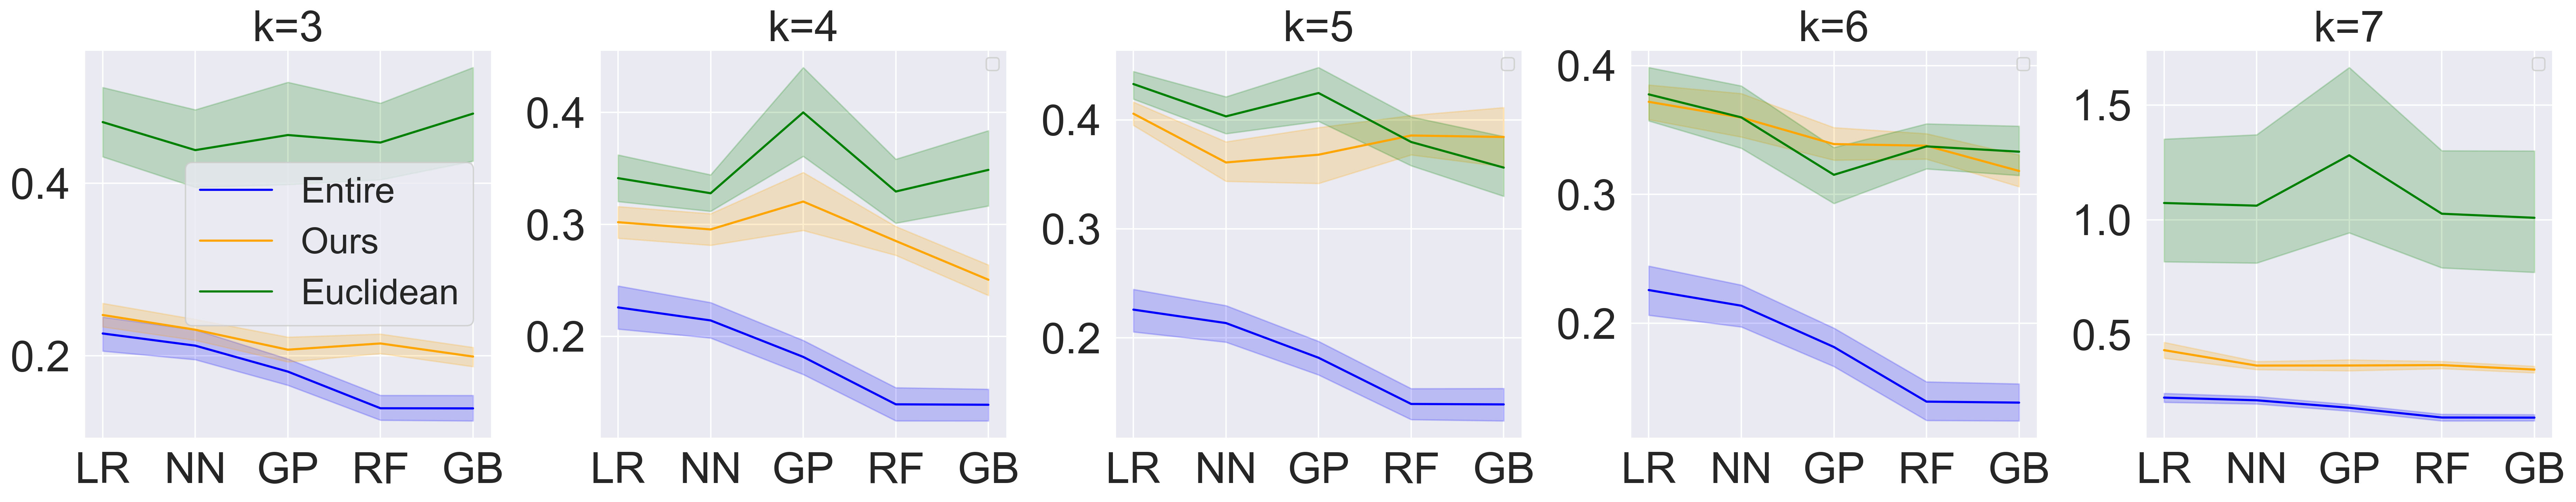

In [231]:
# melted_rmse_df_k3 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 3]
# melted_rmse_df_k4 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 4]
# melted_rmse_df_k5 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 5]
# melted_rmse_df_k6 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 6]
# melted_rmse_df_k7 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 7]

melted_rmse_df_k3 = melted_rmse_df[melted_rmse_df['K'] == 3]
melted_rmse_df_k4 = melted_rmse_df[melted_rmse_df['K'] == 4]
melted_rmse_df_k5 = melted_rmse_df[melted_rmse_df['K'] == 5]
melted_rmse_df_k6 = melted_rmse_df[melted_rmse_df['K'] == 6]
melted_rmse_df_k7 = melted_rmse_df[melted_rmse_df['K'] == 7]

fontsize = 30

# Set the desired order of models
model_order = ['LR', 'NN', 'GP', 'RF', 'GB']

# Convert 'Model' column to a categorical type with the specified order
melted_rmse_df_k3['Model'] = pd.Categorical(melted_rmse_df_k3['Model'], categories=model_order, ordered=True)
melted_rmse_df_k4['Model'] = pd.Categorical(melted_rmse_df_k4['Model'], categories=model_order, ordered=True)
melted_rmse_df_k5['Model'] = pd.Categorical(melted_rmse_df_k5['Model'], categories=model_order, ordered=True)
melted_rmse_df_k6['Model'] = pd.Categorical(melted_rmse_df_k6['Model'], categories=model_order, ordered=True)
melted_rmse_df_k7['Model'] = pd.Categorical(melted_rmse_df_k7['Model'], categories=model_order, ordered=True)

# Set all seaborn settings to default
sns.set()

# Make five figures horizontally side by side, make y log scale
fig, axs = plt.subplots(1, 5, figsize=(25, 5), dpi=300)

# Plot the RMSE for k=3
sns.lineplot(data=melted_rmse_df_k3, x='Model', y='value', hue='Sample', ax=axs[0], palette=colors)
axs[0].legend(fontsize=25, title_fontsize=20)
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[0].set_xticklabels(model_order, fontsize=fontsize)
axs[0].tick_params(axis='y', labelsize=fontsize)
axs[0].set_title('k=3', fontsize=fontsize)

# Plot the RMSE for k=4
sns.lineplot(data=melted_rmse_df_k4, x='Model', y='value', hue='Sample', ax=axs[1], palette=colors)
axs[1].legend('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].set_xticklabels(model_order, fontsize=fontsize)
axs[1].tick_params(axis='y', labelsize=fontsize)
axs[1].set_title('k=4', fontsize=fontsize)

# Plot the RMSE for k=5
sns.lineplot(data=melted_rmse_df_k5, x='Model', y='value', hue='Sample', ax=axs[2], palette=colors)
axs[2].set_ylabel('')
axs[2].set_xlabel('')
axs[2].set_xticklabels(model_order, fontsize=fontsize)
axs[2].tick_params(axis='y', labelsize=fontsize)
axs[2].legend('')
axs[2].set_title('k=5', fontsize=fontsize)

# Plot the RMSE for k=6
sns.lineplot(data=melted_rmse_df_k6, x='Model', y='value', hue='Sample', ax=axs[3], palette=colors)
axs[3].legend('')
axs[3].set_ylabel('')
axs[3].set_xlabel('')
axs[3].set_xticklabels(model_order, fontsize=fontsize)
axs[3].tick_params(axis='y', labelsize=fontsize)
axs[3].set_title('k=6', fontsize=fontsize)

# Plot the RMSE for k=7
sns.lineplot(data=melted_rmse_df_k7, x='Model', y='value', hue='Sample', ax=axs[4], palette=colors)
axs[4].legend('')
axs[4].set_ylabel('')
axs[4].set_xlabel('')
axs[4].set_xticklabels(model_order, fontsize=fontsize)
axs[4].tick_params(axis='y', labelsize=fontsize)
axs[4].set_title('k=7', fontsize=fontsize)

plt.tight_layout()
plt.show()

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=melted_rmse_df_k3, x='Model', y='value', hue='Sample')
# plt.xlabel('Model', fontsize=fontsize)
# plt.xticks(fontsize=fontsize)
# plt.ylabel('RMSE', fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.legend(title='Sample', fontsize=fontsize, title_fontsize=fontsize)
# plt.title('RMSE for k=3', fontsize=fontsize)
# plt.show()

## Gamma

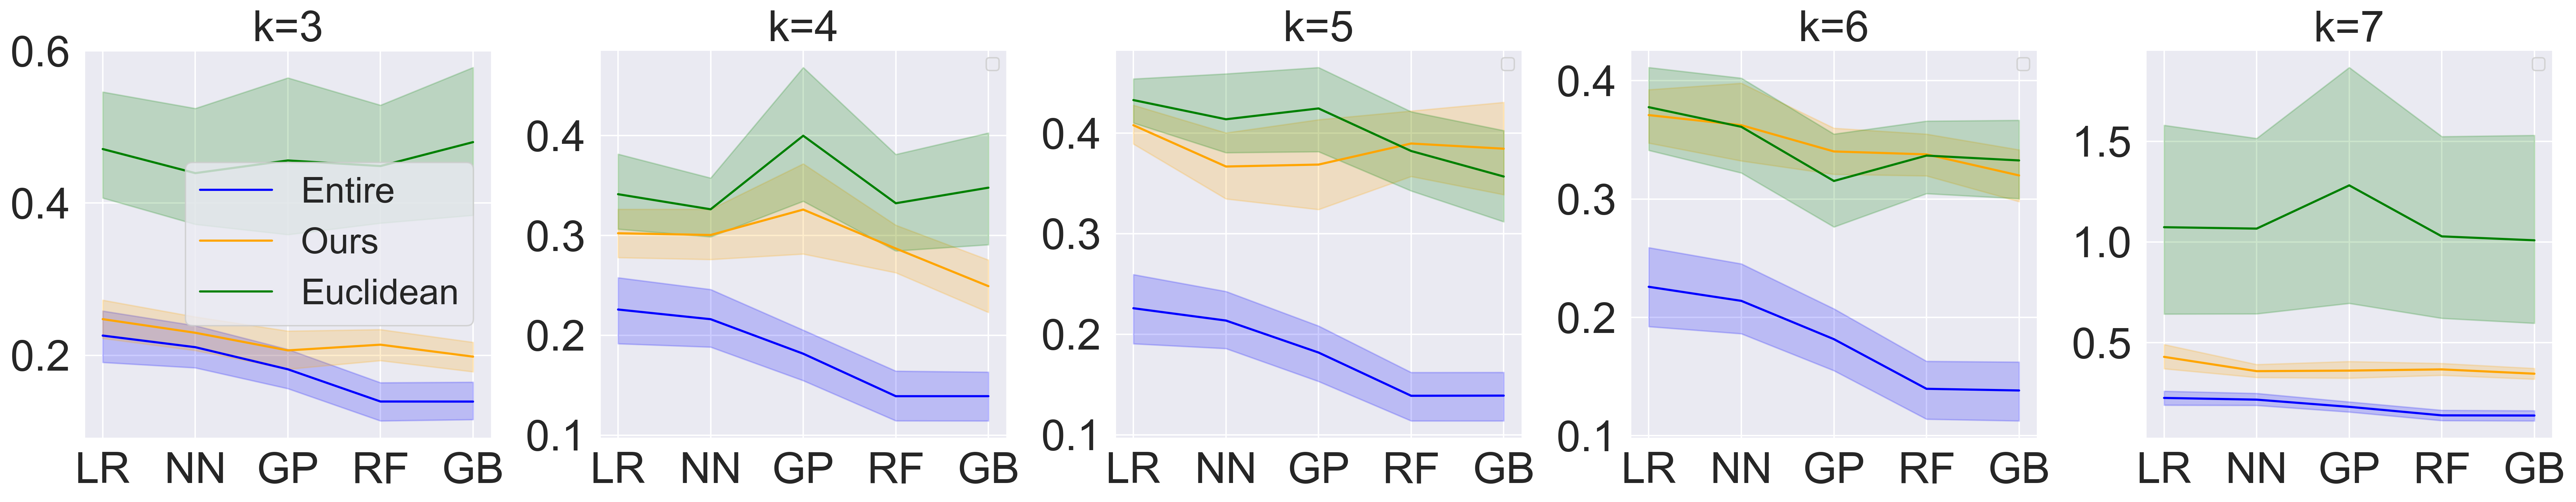

In [275]:
# melted_rmse_df_k3 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 3]
# melted_rmse_df_k4 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 4]
# melted_rmse_df_k5 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 5]
# melted_rmse_df_k6 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 6]
# melted_rmse_df_k7 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 7]

gamma = 1

melted_rmse_df_k3 = melted_rmse_df[(melted_rmse_df['K'] == 3) & (melted_rmse_df['Gamma'] == gamma)]
melted_rmse_df_k4 = melted_rmse_df[(melted_rmse_df['K'] == 4)  & (melted_rmse_df['Gamma'] == gamma)]
melted_rmse_df_k5 = melted_rmse_df[(melted_rmse_df['K'] == 5)  & (melted_rmse_df['Gamma'] == gamma)]
melted_rmse_df_k6 = melted_rmse_df[(melted_rmse_df['K'] == 6)  & (melted_rmse_df['Gamma'] == gamma)]
melted_rmse_df_k7 = melted_rmse_df[(melted_rmse_df['K'] == 7)  & (melted_rmse_df['Gamma'] == gamma)]

fontsize = 30

# Set the desired order of models
model_order = ['LR', 'NN', 'GP', 'RF', 'GB']

# Convert 'Model' column to a categorical type with the specified order
melted_rmse_df_k3['Model'] = pd.Categorical(melted_rmse_df_k3['Model'], categories=model_order, ordered=True)
melted_rmse_df_k4['Model'] = pd.Categorical(melted_rmse_df_k4['Model'], categories=model_order, ordered=True)
melted_rmse_df_k5['Model'] = pd.Categorical(melted_rmse_df_k5['Model'], categories=model_order, ordered=True)
melted_rmse_df_k6['Model'] = pd.Categorical(melted_rmse_df_k6['Model'], categories=model_order, ordered=True)
melted_rmse_df_k7['Model'] = pd.Categorical(melted_rmse_df_k7['Model'], categories=model_order, ordered=True)

# Set all seaborn settings to default
sns.set()

# Make five figures horizontally side by side, make y log scale
fig, axs = plt.subplots(1, 5, figsize=(25, 5), dpi=300)

# Plot the RMSE for k=3
sns.lineplot(data=melted_rmse_df_k3, x='Model', y='value', hue='Sample', ax=axs[0], palette=colors)
axs[0].legend(fontsize=25, title_fontsize=20)
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[0].set_xticklabels(model_order, fontsize=fontsize)
axs[0].tick_params(axis='y', labelsize=fontsize)
axs[0].set_title('k=3', fontsize=fontsize)

# Plot the RMSE for k=4
sns.lineplot(data=melted_rmse_df_k4, x='Model', y='value', hue='Sample', ax=axs[1], palette=colors)
axs[1].legend('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].set_xticklabels(model_order, fontsize=fontsize)
axs[1].tick_params(axis='y', labelsize=fontsize)
axs[1].set_title('k=4', fontsize=fontsize)

# Plot the RMSE for k=5
sns.lineplot(data=melted_rmse_df_k5, x='Model', y='value', hue='Sample', ax=axs[2], palette=colors)
axs[2].set_ylabel('')
axs[2].set_xlabel('')
axs[2].set_xticklabels(model_order, fontsize=fontsize)
axs[2].tick_params(axis='y', labelsize=fontsize)
axs[2].legend('')
axs[2].set_title('k=5', fontsize=fontsize)

# Plot the RMSE for k=6
sns.lineplot(data=melted_rmse_df_k6, x='Model', y='value', hue='Sample', ax=axs[3], palette=colors)
axs[3].legend('')
axs[3].set_ylabel('')
axs[3].set_xlabel('')
axs[3].set_xticklabels(model_order, fontsize=fontsize)
axs[3].tick_params(axis='y', labelsize=fontsize)
axs[3].set_title('k=6', fontsize=fontsize)

# Plot the RMSE for k=7
sns.lineplot(data=melted_rmse_df_k7, x='Model', y='value', hue='Sample', ax=axs[4], palette=colors)
axs[4].legend('')
axs[4].set_ylabel('')
axs[4].set_xlabel('')
axs[4].set_xticklabels(model_order, fontsize=fontsize)
axs[4].tick_params(axis='y', labelsize=fontsize)
axs[4].set_title('k=7', fontsize=fontsize)

plt.tight_layout()
plt.show()

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=melted_rmse_df_k3, x='Model', y='value', hue='Sample')
# plt.xlabel('Model', fontsize=fontsize)
# plt.xticks(fontsize=fontsize)
# plt.ylabel('RMSE', fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.legend(title='Sample', fontsize=fontsize, title_fontsize=fontsize)
# plt.title('RMSE for k=3', fontsize=fontsize)
# plt.show()

## Lambda

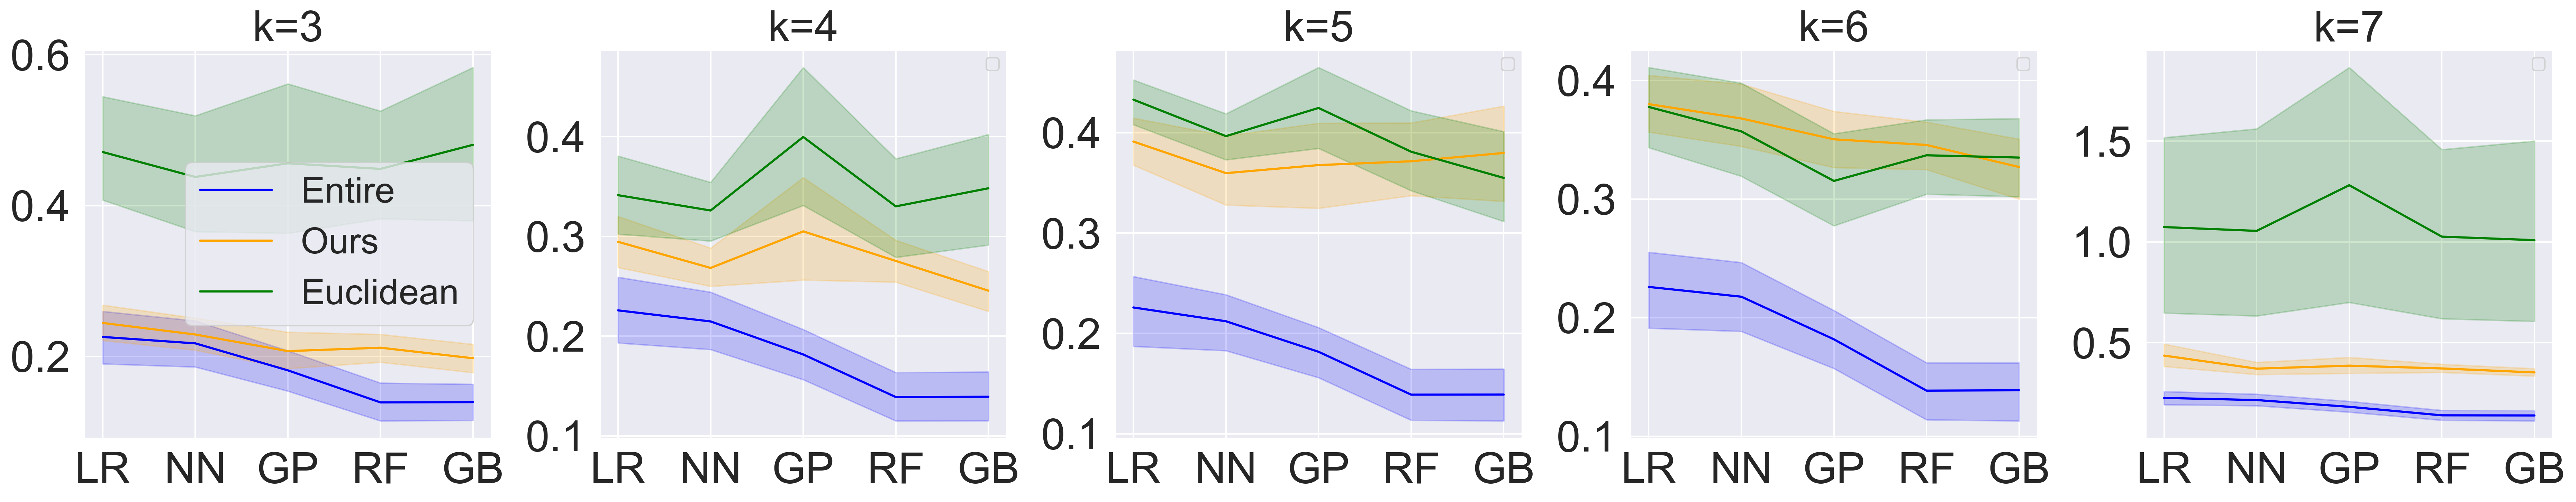

In [278]:
# melted_rmse_df_k3 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 3]
# melted_rmse_df_k4 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 4]
# melted_rmse_df_k5 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 5]
# melted_rmse_df_k6 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 6]
# melted_rmse_df_k7 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 7]

Lambda = 0.1

melted_rmse_df_k3 = melted_rmse_df[(melted_rmse_df['K'] == 3) & (melted_rmse_df['Lambda'] == Lambda)]
melted_rmse_df_k4 = melted_rmse_df[(melted_rmse_df['K'] == 4)  & (melted_rmse_df['Lambda'] == Lambda)]
melted_rmse_df_k5 = melted_rmse_df[(melted_rmse_df['K'] == 5)  & (melted_rmse_df['Lambda'] == Lambda)]
melted_rmse_df_k6 = melted_rmse_df[(melted_rmse_df['K'] == 6)  &  (melted_rmse_df['Lambda'] == Lambda)]
melted_rmse_df_k7 = melted_rmse_df[(melted_rmse_df['K'] == 7)  & (melted_rmse_df['Lambda'] == Lambda)]

fontsize = 30

# Set the desired order of models
model_order = ['LR', 'NN', 'GP', 'RF', 'GB']

# Convert 'Model' column to a categorical type with the specified order
melted_rmse_df_k3['Model'] = pd.Categorical(melted_rmse_df_k3['Model'], categories=model_order, ordered=True)
melted_rmse_df_k4['Model'] = pd.Categorical(melted_rmse_df_k4['Model'], categories=model_order, ordered=True)
melted_rmse_df_k5['Model'] = pd.Categorical(melted_rmse_df_k5['Model'], categories=model_order, ordered=True)
melted_rmse_df_k6['Model'] = pd.Categorical(melted_rmse_df_k6['Model'], categories=model_order, ordered=True)
melted_rmse_df_k7['Model'] = pd.Categorical(melted_rmse_df_k7['Model'], categories=model_order, ordered=True)

# Set all seaborn settings to default
sns.set()

# Make five figures horizontally side by side, make y log scale
fig, axs = plt.subplots(1, 5, figsize=(25, 5), dpi=300)

# Plot the RMSE for k=3
sns.lineplot(data=melted_rmse_df_k3, x='Model', y='value', hue='Sample', ax=axs[0], palette=colors)
axs[0].legend(fontsize=25, title_fontsize=20)
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[0].set_xticklabels(model_order, fontsize=fontsize)
axs[0].tick_params(axis='y', labelsize=fontsize)
axs[0].set_title('k=3', fontsize=fontsize)

# Plot the RMSE for k=4
sns.lineplot(data=melted_rmse_df_k4, x='Model', y='value', hue='Sample', ax=axs[1], palette=colors)
axs[1].legend('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].set_xticklabels(model_order, fontsize=fontsize)
axs[1].tick_params(axis='y', labelsize=fontsize)
axs[1].set_title('k=4', fontsize=fontsize)

# Plot the RMSE for k=5
sns.lineplot(data=melted_rmse_df_k5, x='Model', y='value', hue='Sample', ax=axs[2], palette=colors)
axs[2].set_ylabel('')
axs[2].set_xlabel('')
axs[2].set_xticklabels(model_order, fontsize=fontsize)
axs[2].tick_params(axis='y', labelsize=fontsize)
axs[2].legend('')
axs[2].set_title('k=5', fontsize=fontsize)

# Plot the RMSE for k=6
sns.lineplot(data=melted_rmse_df_k6, x='Model', y='value', hue='Sample', ax=axs[3], palette=colors)
axs[3].legend('')
axs[3].set_ylabel('')
axs[3].set_xlabel('')
axs[3].set_xticklabels(model_order, fontsize=fontsize)
axs[3].tick_params(axis='y', labelsize=fontsize)
axs[3].set_title('k=6', fontsize=fontsize)

# Plot the RMSE for k=7
sns.lineplot(data=melted_rmse_df_k7, x='Model', y='value', hue='Sample', ax=axs[4], palette=colors)
axs[4].legend('')
axs[4].set_ylabel('')
axs[4].set_xlabel('')
axs[4].set_xticklabels(model_order, fontsize=fontsize)
axs[4].tick_params(axis='y', labelsize=fontsize)
axs[4].set_title('k=7', fontsize=fontsize)

plt.tight_layout()
plt.show()

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=melted_rmse_df_k3, x='Model', y='value', hue='Sample')
# plt.xlabel('Model', fontsize=fontsize)
# plt.xticks(fontsize=fontsize)
# plt.ylabel('RMSE', fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.legend(title='Sample', fontsize=fontsize, title_fontsize=fontsize)
# plt.title('RMSE for k=3', fontsize=fontsize)
# plt.show()

## N

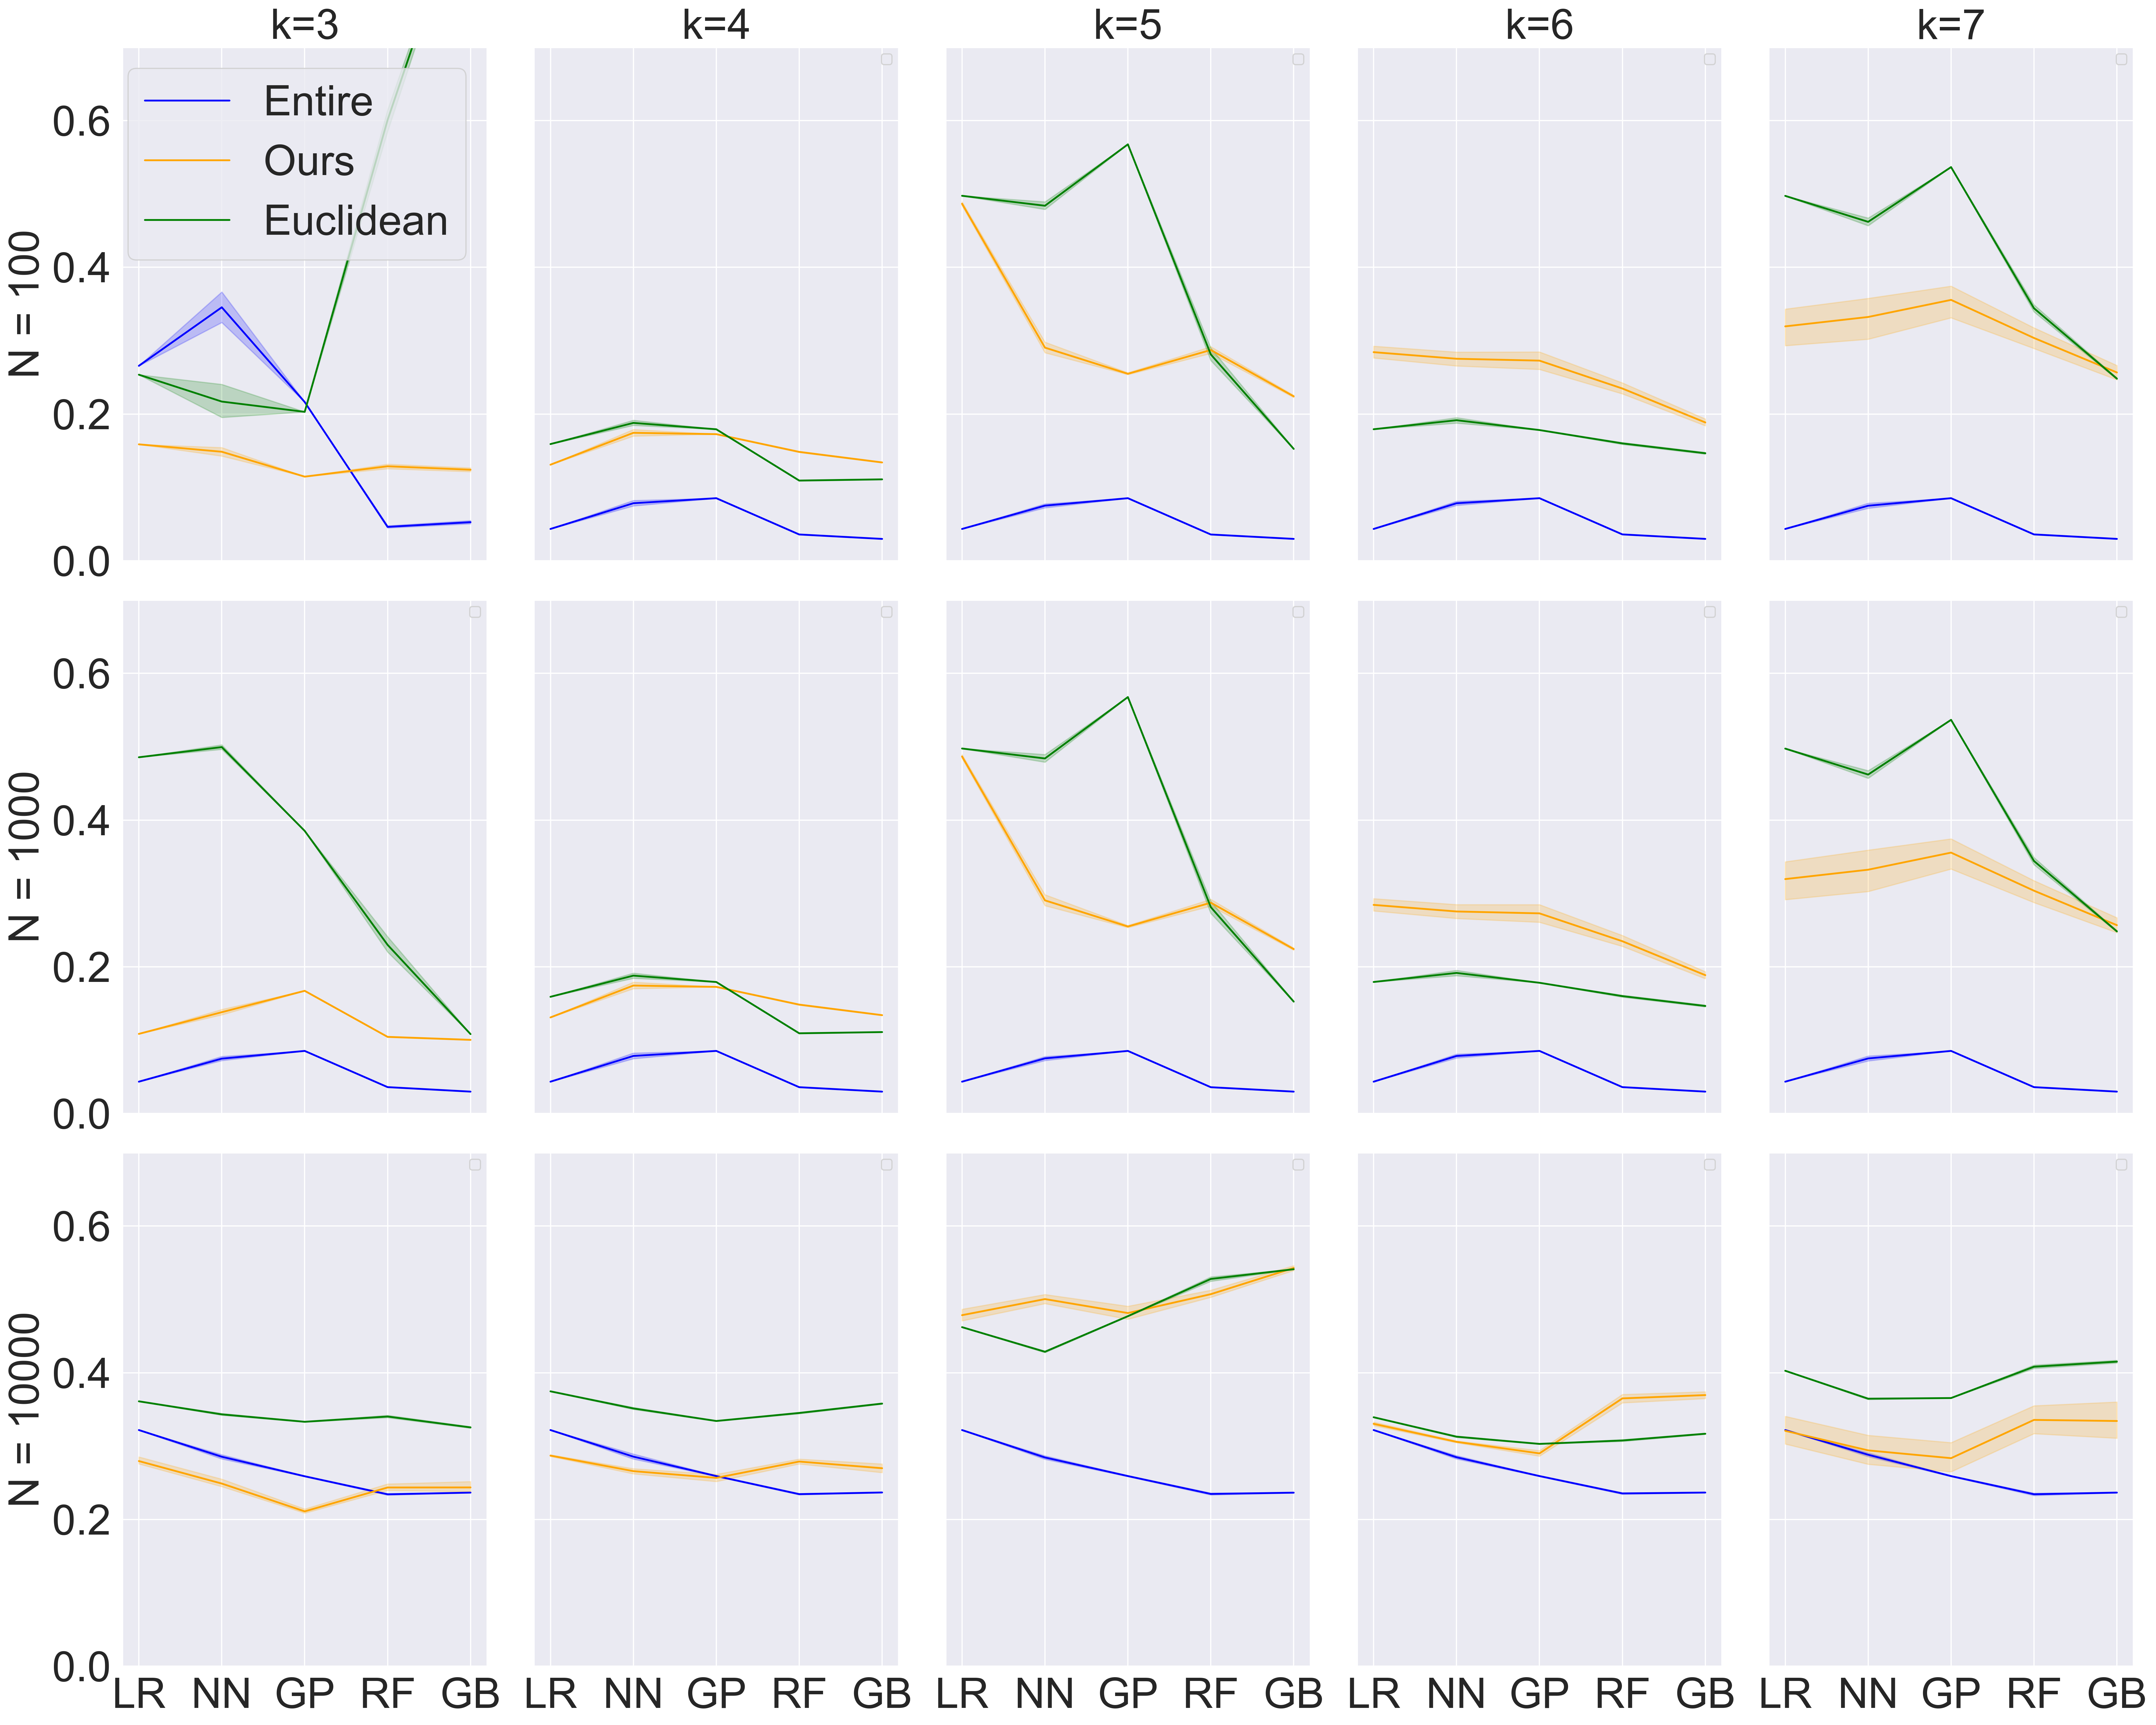

In [296]:
# melted_rmse_df_k3 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 3]
# melted_rmse_df_k4 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 4]
# melted_rmse_df_k5 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 5]
# melted_rmse_df_k6 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 6]
# melted_rmse_df_k7 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 7]

N = 100

melted_rmse_df_k3_100 = melted_rmse_df[(melted_rmse_df['K'] == 3) & (melted_rmse_df['N'] == N)]
melted_rmse_df_k4_100 = melted_rmse_df[(melted_rmse_df['K'] == 4)  & (melted_rmse_df['N'] == N)]
melted_rmse_df_k5_100 = melted_rmse_df[(melted_rmse_df['K'] == 5)  & (melted_rmse_df['N'] == N)]
melted_rmse_df_k6_100 = melted_rmse_df[(melted_rmse_df['K'] == 6)  &  (melted_rmse_df['N'] == N)]
melted_rmse_df_k7_100 = melted_rmse_df[(melted_rmse_df['K'] == 7)  & (melted_rmse_df['N'] == N)]

N = 1000

melted_rmse_df_k3_1000 = melted_rmse_df[(melted_rmse_df['K'] == 3) & (melted_rmse_df['N'] == N)]
melted_rmse_df_k4_1000 = melted_rmse_df[(melted_rmse_df['K'] == 4)  & (melted_rmse_df['N'] == N)]
melted_rmse_df_k5_1000 = melted_rmse_df[(melted_rmse_df['K'] == 5)  & (melted_rmse_df['N'] == N)]
melted_rmse_df_k6_1000 = melted_rmse_df[(melted_rmse_df['K'] == 6)  &  (melted_rmse_df['N'] == N)]
melted_rmse_df_k7_1000 = melted_rmse_df[(melted_rmse_df['K'] == 7)  & (melted_rmse_df['N'] == N)]

N = 10000

melted_rmse_df_k3_10000 = melted_rmse_df[(melted_rmse_df['K'] == 3) & (melted_rmse_df['N'] == N)]
melted_rmse_df_k4_10000 = melted_rmse_df[(melted_rmse_df['K'] == 4)  & (melted_rmse_df['N'] == N)]
melted_rmse_df_k5_10000 = melted_rmse_df[(melted_rmse_df['K'] == 5)  & (melted_rmse_df['N'] == N)]
melted_rmse_df_k6_10000 = melted_rmse_df[(melted_rmse_df['K'] == 6)  &  (melted_rmse_df['N'] == N)]
melted_rmse_df_k7_10000 = melted_rmse_df[(melted_rmse_df['K'] == 7)  & (melted_rmse_df['N'] == N)]


fontsize = 35

# Set the desired order of models
model_order = ['LR', 'NN', 'GP', 'RF', 'GB']

# Convert 'Model' column to a categorical type with the specified order
melted_rmse_df_k3_100['Model'] = pd.Categorical(melted_rmse_df_k3_100['Model'], categories=model_order, ordered=True)
melted_rmse_df_k4_100['Model'] = pd.Categorical(melted_rmse_df_k4_100['Model'], categories=model_order, ordered=True)
melted_rmse_df_k5_100['Model'] = pd.Categorical(melted_rmse_df_k5_100['Model'], categories=model_order, ordered=True)
melted_rmse_df_k6_100['Model'] = pd.Categorical(melted_rmse_df_k6_100['Model'], categories=model_order, ordered=True)
melted_rmse_df_k7_100['Model'] = pd.Categorical(melted_rmse_df_k7_100['Model'], categories=model_order, ordered=True)
melted_rmse_df_k3_1000['Model'] = pd.Categorical(melted_rmse_df_k3_1000['Model'], categories=model_order, ordered=True)
melted_rmse_df_k4_1000['Model'] = pd.Categorical(melted_rmse_df_k4_1000['Model'], categories=model_order, ordered=True)
melted_rmse_df_k5_1000['Model'] = pd.Categorical(melted_rmse_df_k5_1000['Model'], categories=model_order, ordered=True)
melted_rmse_df_k6_1000['Model'] = pd.Categorical(melted_rmse_df_k6_1000['Model'], categories=model_order, ordered=True)
melted_rmse_df_k7_1000['Model'] = pd.Categorical(melted_rmse_df_k7_1000['Model'], categories=model_order, ordered=True)
melted_rmse_df_k3_10000['Model'] = pd.Categorical(melted_rmse_df_k3_10000['Model'], categories=model_order, ordered=True)
melted_rmse_df_k4_10000['Model'] = pd.Categorical(melted_rmse_df_k4_10000['Model'], categories=model_order, ordered=True)
melted_rmse_df_k5_10000['Model'] = pd.Categorical(melted_rmse_df_k5_10000['Model'], categories=model_order, ordered=True)
melted_rmse_df_k6_10000['Model'] = pd.Categorical(melted_rmse_df_k6_10000['Model'], categories=model_order, ordered=True)
melted_rmse_df_k7_10000['Model'] = pd.Categorical(melted_rmse_df_k7_10000['Model'], categories=model_order, ordered=True)

# Set all seaborn settings to default
sns.set()

# Make 20 figures, 4 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(25, 20), dpi=300, sharey=True, sharex=True)

# Limit y-axis to 0.7
for i in range(3):
    for j in range(5):
        axs[i, j].set_ylim(0, 0.7)

# Plot the RMSE for k=3
sns.lineplot(data=melted_rmse_df_k3_100, x='Model', y='value', hue='Sample', ax=axs[0, 0], palette=colors)
axs[0, 0].legend(fontsize=35, title_fontsize=25)
axs[0, 0].set_ylabel('N = 100', fontsize=fontsize)
axs[0, 0].set_xlabel('')
axs[0, 0].set_xticklabels(model_order, fontsize=fontsize)
axs[0, 0].tick_params(axis='y', labelsize=fontsize)
axs[0, 0].set_title('k=3', fontsize=fontsize)

# Plot the RMSE for k=4
sns.lineplot(data=melted_rmse_df_k4, x='Model', y='value', hue='Sample', ax=axs[0, 1], palette=colors)
axs[0, 1].legend('')
axs[0, 1].set_ylabel('')
axs[0, 1].set_xlabel('')
axs[0, 1].set_xticklabels(model_order, fontsize=fontsize)
axs[0, 1].tick_params(axis='y', labelsize=fontsize)
axs[0, 1].set_title('k=4', fontsize=fontsize)

# Plot the RMSE for k=5
sns.lineplot(data=melted_rmse_df_k5, x='Model', y='value', hue='Sample', ax=axs[0, 2], palette=colors)
axs[0, 2].set_ylabel('')
axs[0, 2].set_xlabel('')
axs[0, 2].set_xticklabels(model_order, fontsize=fontsize)
axs[0, 2].tick_params(axis='y', labelsize=fontsize)
axs[0, 2].legend('')
axs[0, 2].set_title('k=5', fontsize=fontsize)

# Plot the RMSE for k=6
sns.lineplot(data=melted_rmse_df_k6, x='Model', y='value', hue='Sample', ax=axs[0, 3], palette=colors)
axs[0, 3].legend('')
axs[0, 3].set_ylabel('')
axs[0, 3].set_xlabel('')
axs[0, 3].set_xticklabels(model_order, fontsize=fontsize)
axs[0, 3].tick_params(axis='y', labelsize=fontsize)
axs[0, 3].set_title('k=6', fontsize=fontsize)

# Plot the RMSE for k=7
sns.lineplot(data=melted_rmse_df_k7, x='Model', y='value', hue='Sample', ax=axs[0, 4], palette=colors)
axs[0, 4].legend('')
axs[0, 4].set_ylabel('')
axs[0, 4].set_xlabel('')
axs[0, 4].set_xticklabels(model_order, fontsize=fontsize)
axs[0, 4].tick_params(axis='y', labelsize=fontsize)
axs[0, 4].set_title('k=7', fontsize=fontsize)

# Plot the RMSE for k=3
sns.lineplot(data=melted_rmse_df_k3_1000, x='Model', y='value', hue='Sample', ax=axs[1, 0], palette=colors)
axs[1, 0].legend('')
axs[1, 0].set_ylabel('N = 1000', fontsize=fontsize)
axs[1, 0].set_xlabel('')
axs[1, 0].set_xticklabels(model_order, fontsize=fontsize)
axs[1, 0].tick_params(axis='y', labelsize=fontsize)

# Plot the RMSE for k=4
sns.lineplot(data=melted_rmse_df_k4_1000, x='Model', y='value', hue='Sample', ax=axs[1, 1], palette=colors)
axs[1, 1].legend('')
axs[1, 1].set_ylabel('')
axs[1, 1].set_xlabel('')
axs[1, 1].set_xticklabels(model_order, fontsize=fontsize)
axs[1, 1].tick_params(axis='y', labelsize=fontsize)

# Plot the RMSE for k=5
sns.lineplot(data=melted_rmse_df_k5_1000, x='Model', y='value', hue='Sample', ax=axs[1, 2], palette=colors)
axs[1, 2].set_ylabel('')
axs[1, 2].set_xlabel('')
axs[1, 2].set_xticklabels(model_order, fontsize=fontsize)
axs[1, 2].tick_params(axis='y', labelsize=fontsize)
axs[1, 2].legend('')

# Plot the RMSE for k=6
sns.lineplot(data=melted_rmse_df_k6_1000, x='Model', y='value', hue='Sample', ax=axs[1, 3], palette=colors)
axs[1, 3].legend('')
axs[1, 3].set_ylabel('')
axs[1, 3].set_xlabel('')
axs[1, 3].set_xticklabels(model_order, fontsize=fontsize)
axs[1, 3].tick_params(axis='y', labelsize=fontsize)

# Plot the RMSE for k=7
sns.lineplot(data=melted_rmse_df_k7_1000, x='Model', y='value', hue='Sample', ax=axs[1, 4], palette=colors)
axs[1, 4].legend('')
axs[1, 4].set_ylabel('')
axs[1, 4].set_xlabel('')
axs[1, 4].set_xticklabels(model_order, fontsize=fontsize)
axs[1, 4].tick_params(axis='y', labelsize=fontsize)

# Plot the RMSE for k=3
sns.lineplot(data=melted_rmse_df_k3_10000, x='Model', y='value', hue='Sample', ax=axs[2, 0], palette=colors)
axs[2, 0].legend('')
axs[2, 0].set_ylabel('N = 10000', fontsize=fontsize)
axs[2, 0].set_xlabel('')
axs[2, 0].set_xticklabels(model_order, fontsize=fontsize)
axs[2, 0].tick_params(axis='y', labelsize=fontsize)

# Plot the RMSE for k=4
sns.lineplot(data=melted_rmse_df_k4_10000, x='Model', y='value', hue='Sample', ax=axs[2, 1], palette=colors)
axs[2, 1].legend('')
axs[2, 1].set_ylabel('')
axs[2, 1].set_xlabel('')
axs[2, 1].set_xticklabels(model_order, fontsize=fontsize)
axs[2, 1].tick_params(axis='y', labelsize=fontsize)

# Plot the RMSE for k=5
sns.lineplot(data=melted_rmse_df_k5_10000, x='Model', y='value', hue='Sample', ax=axs[2, 2], palette=colors)
axs[2, 2].set_ylabel('')
axs[2, 2].set_xlabel('')
axs[2, 2].set_xticklabels(model_order, fontsize=fontsize)
axs[2, 2].tick_params(axis='y', labelsize=fontsize)
axs[2, 2].legend('')

# Plot the RMSE for k=6
sns.lineplot(data=melted_rmse_df_k6_10000, x='Model', y='value', hue='Sample', ax=axs[2, 3], palette=colors)
axs[2, 3].legend('')
axs[2, 3].set_ylabel('')
axs[2, 3].set_xlabel('')
axs[2, 3].set_xticklabels(model_order, fontsize=fontsize)
axs[2, 3].tick_params(axis='y', labelsize=fontsize)

# Plot the RMSE for k=7
sns.lineplot(data=melted_rmse_df_k7_10000, x='Model', y='value', hue='Sample', ax=axs[2, 4], palette=colors)
axs[2, 4].legend('')
axs[2, 4].set_ylabel('')
axs[2, 4].set_xlabel('')
axs[2, 4].set_xticklabels(model_order, fontsize=fontsize)
axs[2, 4].tick_params(axis='y', labelsize=fontsize)

plt.tight_layout()
plt.show()

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=melted_rmse_df_k3, x='Model', y='value', hue='Sample')
# plt.xlabel('Model', fontsize=fontsize)
# plt.xticks(fontsize=fontsize)
# plt.ylabel('RMSE', fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.legend(title='Sample', fontsize=fontsize, title_fontsize=fontsize)
# plt.title('RMSE for k=3', fontsize=fontsize)
# plt.show()

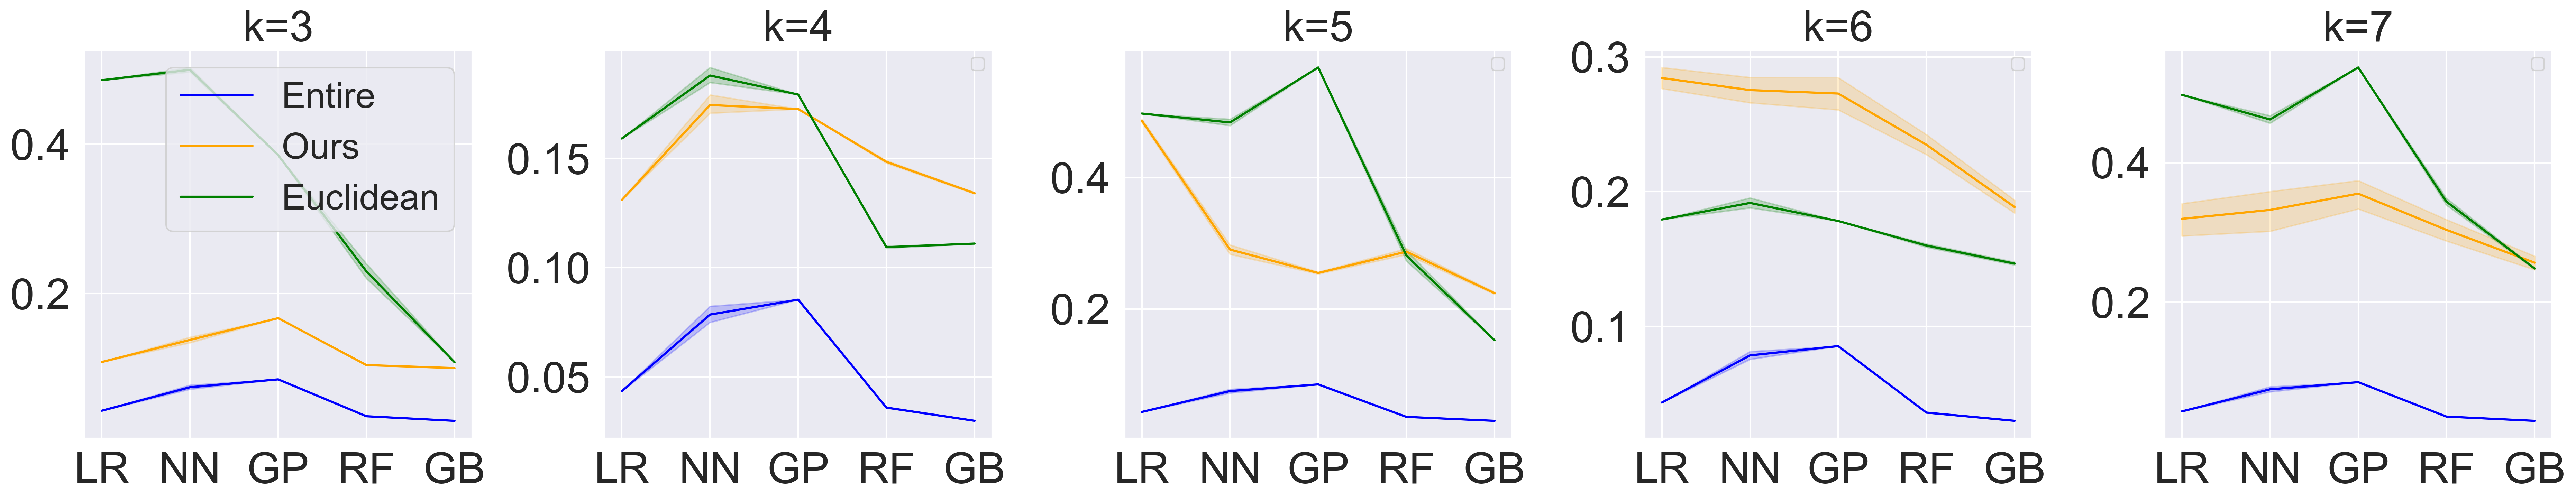

In [283]:
# melted_rmse_df_k3 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 3]
# melted_rmse_df_k4 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 4]
# melted_rmse_df_k5 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 5]
# melted_rmse_df_k6 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 6]
# melted_rmse_df_k7 = melted_rmsenorm_df[melted_rmsenorm_df['K'] == 7]

N = 1000

melted_rmse_df_k3 = melted_rmse_df[(melted_rmse_df['K'] == 3) & (melted_rmse_df['N'] == N)]
melted_rmse_df_k4 = melted_rmse_df[(melted_rmse_df['K'] == 4)  & (melted_rmse_df['N'] == N)]
melted_rmse_df_k5 = melted_rmse_df[(melted_rmse_df['K'] == 5)  & (melted_rmse_df['N'] == N)]
melted_rmse_df_k6 = melted_rmse_df[(melted_rmse_df['K'] == 6)  &  (melted_rmse_df['N'] == N)]
melted_rmse_df_k7 = melted_rmse_df[(melted_rmse_df['K'] == 7)  & (melted_rmse_df['N'] == N)]

fontsize = 30

# Set the desired order of models
model_order = ['LR', 'NN', 'GP', 'RF', 'GB']

# Convert 'Model' column to a categorical type with the specified order
melted_rmse_df_k3['Model'] = pd.Categorical(melted_rmse_df_k3['Model'], categories=model_order, ordered=True)
melted_rmse_df_k4['Model'] = pd.Categorical(melted_rmse_df_k4['Model'], categories=model_order, ordered=True)
melted_rmse_df_k5['Model'] = pd.Categorical(melted_rmse_df_k5['Model'], categories=model_order, ordered=True)
melted_rmse_df_k6['Model'] = pd.Categorical(melted_rmse_df_k6['Model'], categories=model_order, ordered=True)
melted_rmse_df_k7['Model'] = pd.Categorical(melted_rmse_df_k7['Model'], categories=model_order, ordered=True)

# Set all seaborn settings to default
sns.set()

# Make five figures horizontally side by side, make y log scale
fig, axs = plt.subplots(1, 5, figsize=(25, 5), dpi=300)

# Plot the RMSE for k=3
sns.lineplot(data=melted_rmse_df_k3, x='Model', y='value', hue='Sample', ax=axs[0], palette=colors)
axs[0].legend(fontsize=25, title_fontsize=20)
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[0].set_xticklabels(model_order, fontsize=fontsize)
axs[0].tick_params(axis='y', labelsize=fontsize)
axs[0].set_title('k=3', fontsize=fontsize)

# Plot the RMSE for k=4
sns.lineplot(data=melted_rmse_df_k4, x='Model', y='value', hue='Sample', ax=axs[1], palette=colors)
axs[1].legend('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].set_xticklabels(model_order, fontsize=fontsize)
axs[1].tick_params(axis='y', labelsize=fontsize)
axs[1].set_title('k=4', fontsize=fontsize)

# Plot the RMSE for k=5
sns.lineplot(data=melted_rmse_df_k5, x='Model', y='value', hue='Sample', ax=axs[2], palette=colors)
axs[2].set_ylabel('')
axs[2].set_xlabel('')
axs[2].set_xticklabels(model_order, fontsize=fontsize)
axs[2].tick_params(axis='y', labelsize=fontsize)
axs[2].legend('')
axs[2].set_title('k=5', fontsize=fontsize)

# Plot the RMSE for k=6
sns.lineplot(data=melted_rmse_df_k6, x='Model', y='value', hue='Sample', ax=axs[3], palette=colors)
axs[3].legend('')
axs[3].set_ylabel('')
axs[3].set_xlabel('')
axs[3].set_xticklabels(model_order, fontsize=fontsize)
axs[3].tick_params(axis='y', labelsize=fontsize)
axs[3].set_title('k=6', fontsize=fontsize)

# Plot the RMSE for k=7
sns.lineplot(data=melted_rmse_df_k7, x='Model', y='value', hue='Sample', ax=axs[4], palette=colors)
axs[4].legend('')
axs[4].set_ylabel('')
axs[4].set_xlabel('')
axs[4].set_xticklabels(model_order, fontsize=fontsize)
axs[4].tick_params(axis='y', labelsize=fontsize)
axs[4].set_title('k=7', fontsize=fontsize)

plt.tight_layout()
plt.show()

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=melted_rmse_df_k3, x='Model', y='value', hue='Sample')
# plt.xlabel('Model', fontsize=fontsize)
# plt.xticks(fontsize=fontsize)
# plt.ylabel('RMSE', fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.legend(title='Sample', fontsize=fontsize, title_fontsize=fontsize)
# plt.title('RMSE for k=3', fontsize=fontsize)
# plt.show()

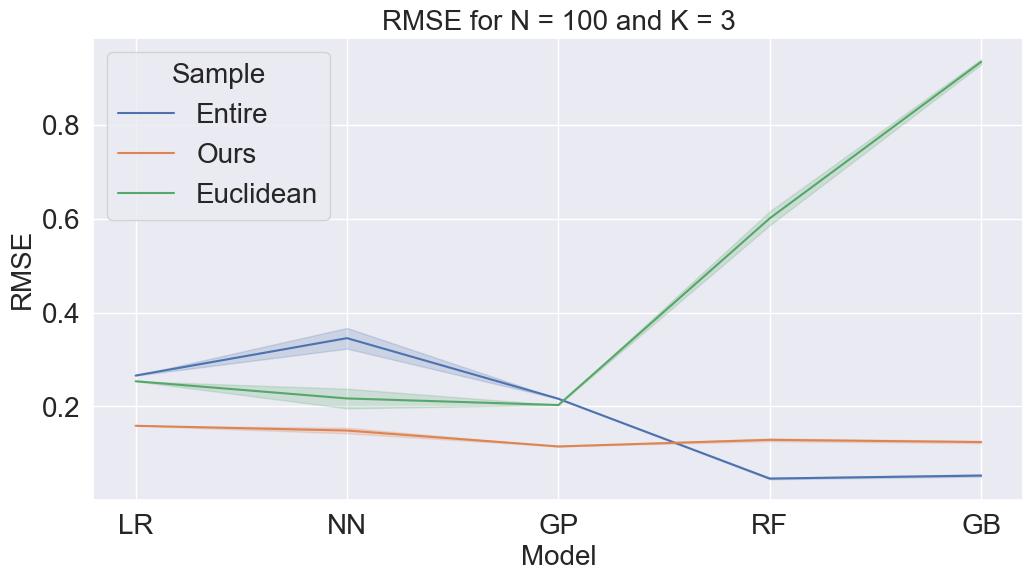

In [281]:
# Function to plot the data
def plot_rmse(df, n, k, fontsize=20):
    # Filter the DataFrame based on 'K'
    filtered_df = df[df['K'] == k]
    
    # Set the desired order of models
    model_order = ['LR', 'NN', 'GP', 'RF', 'GB']

    # Convert 'Model' column to a categorical type with the specified order
    filtered_df['Model'] = pd.Categorical(filtered_df['Model'], categories=model_order, ordered=True)

    # Set all seaborn settings to default
    sns.set()

    # Plot with the specified order
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=filtered_df, x='Model', y='value', hue='Sample')
    plt.xlabel('Model', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.ylabel('RMSE', fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(title='Sample', fontsize=fontsize, title_fontsize=fontsize)
    plt.title(f"RMSE for N = {n} and K = {k}", fontsize=fontsize)
    plt.show()

# Specify the number of training points and value of K
n = 100
k = 3

# Construct the dynamic variable name
variable_name = f"melted_rmse_df_{n}_k{k}"

# Use exec to dynamically assign the DataFrame to a variable
exec(f"{variable_name} = melted_rmse_df_{n}")

# Dynamically retrieve the DataFrame using eval and plot
plot_rmse(eval(variable_name), n, k)

Text(0.5, 1.0, 'k=7')

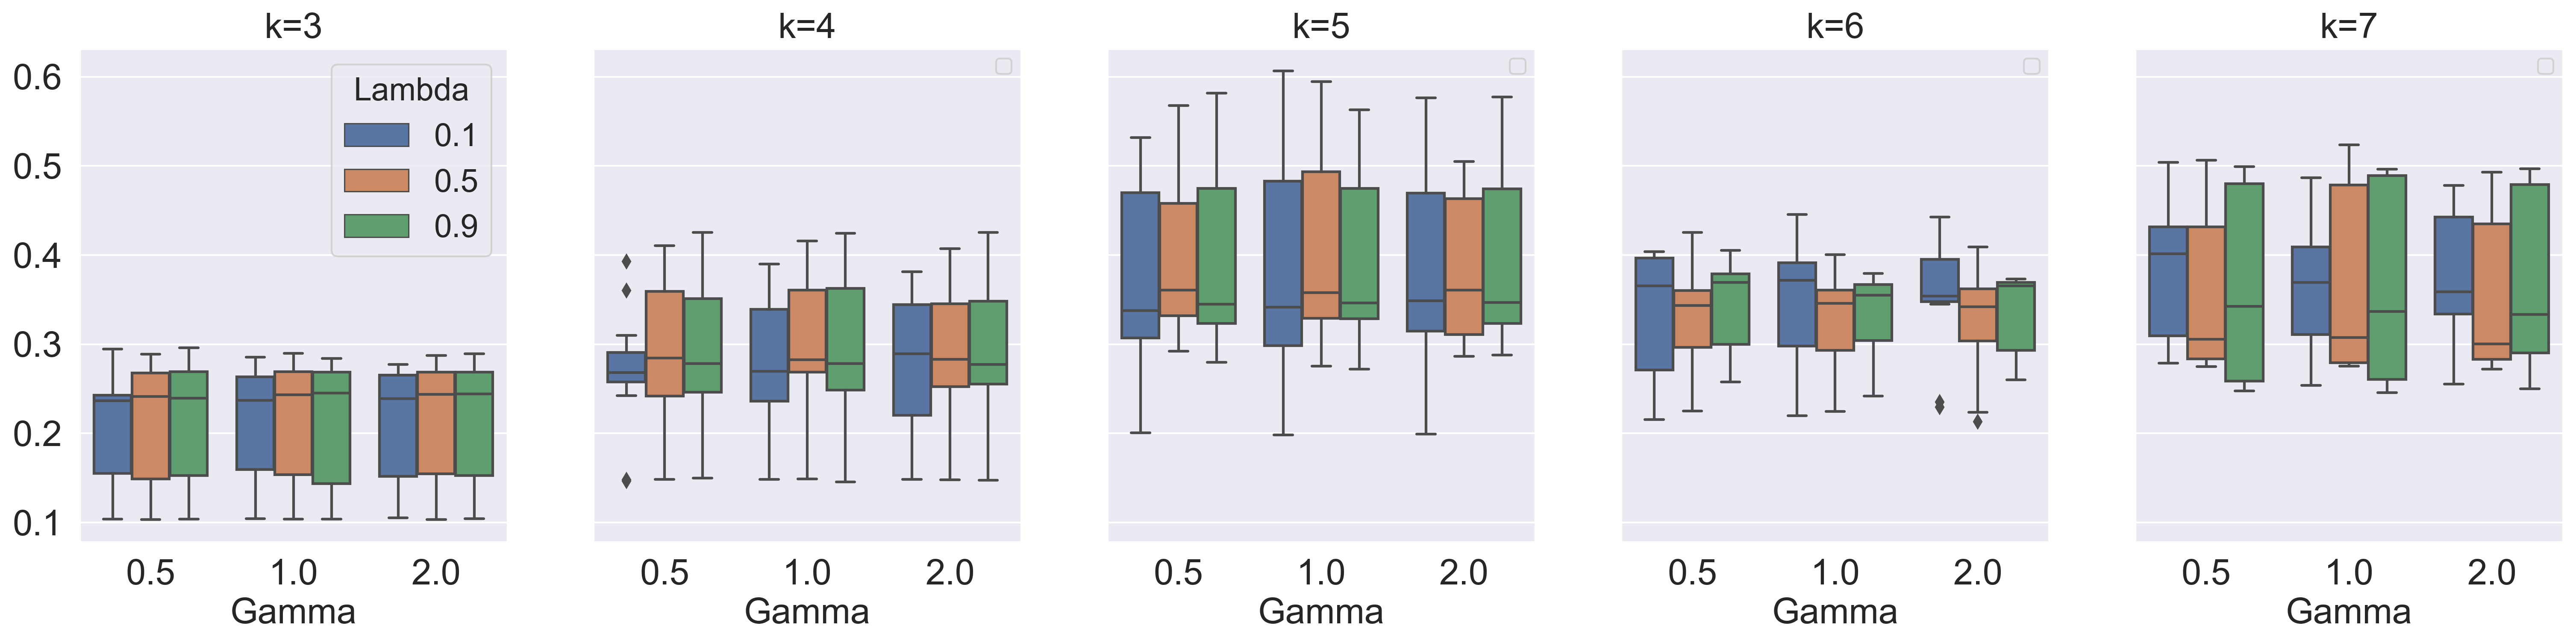

In [165]:
melted_rmse_df_k3_ours_rf = melted_rmse_df[(melted_rmse_df['K'] == 3) & 
                                           (melted_rmse_df['Sample'] == 'Ours') & 
                                           (melted_rmse_df['Model'] == 'RF')
                                           ]
melted_rmse_df_k4_ours_rf = melted_rmse_df[(melted_rmse_df['K'] == 4) & (melted_rmse_df['Sample'] == 'Ours') & (melted_rmse_df['Model'] == 'RF')]
melted_rmse_df_k5_ours_rf = melted_rmse_df[(melted_rmse_df['K'] == 5) & (melted_rmse_df['Sample'] == 'Ours') & (melted_rmse_df['Model'] == 'RF')]
melted_rmse_df_k6_ours_rf = melted_rmse_df[(melted_rmse_df['K'] == 6) & (melted_rmse_df['Sample'] == 'Ours') & (melted_rmse_df['Model'] == 'RF')]
melted_rmse_df_k7_ours_rf = melted_rmse_df[(melted_rmse_df['K'] == 7) & (melted_rmse_df['Sample'] == 'Ours') & (melted_rmse_df['Model'] == 'RF')]

fontsize = 20

# Set all seaborn settings to default
sns.set()

# Make five figures horizontally side by side, make y log scale
fig, axs = plt.subplots(1, 5, figsize=(25, 5), dpi=300, sharey=True)

# Plot the RMSE for k=3
sns.boxplot(data=melted_rmse_df_k3_ours_rf, x='Gamma', y='value', hue='Lambda', ax=axs[0])
axs[0].legend(title='Lambda', fontsize=18, title_fontsize=18)
axs[0].set_ylabel('')
axs[0].set_xlabel('Gamma', fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize)
axs[0].tick_params(axis='y', labelsize=fontsize)
axs[0].set_title('k=3', fontsize=fontsize)

# Plot the RMSE for k=4
sns.boxplot(data=melted_rmse_df_k4_ours_rf, x='Gamma', y='value', hue='Lambda', ax=axs[1])
axs[1].legend('')
axs[1].set_ylabel('')
axs[1].set_xlabel('Gamma', fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize)
axs[1].tick_params(axis='y', labelsize=fontsize)
axs[1].set_title('k=4', fontsize=fontsize)

# Plot the RMSE for k=5
sns.boxplot(data=melted_rmse_df_k5_ours_rf, x='Gamma', y='value', hue='Lambda', ax=axs[2])
axs[2].set_ylabel('')
axs[2].set_xlabel('Gamma', fontsize=fontsize)
axs[2].tick_params(axis='x', labelsize=fontsize)
axs[2].tick_params(axis='y', labelsize=fontsize)
axs[2].legend('')
axs[2].set_title('k=5', fontsize=fontsize)

# Plot the RMSE for k=6
sns.boxplot(data=melted_rmse_df_k6_ours_rf, x='Gamma', y='value', hue='Lambda', ax=axs[3])
axs[3].legend('')
axs[3].set_ylabel('')
axs[3].set_xlabel('Gamma', fontsize=fontsize)
axs[3].tick_params(axis='x', labelsize=fontsize)
axs[3].tick_params(axis='y', labelsize=fontsize)
axs[3].set_title('k=6', fontsize=fontsize)

# Plot the RMSE for k=7
sns.boxplot(data=melted_rmse_df_k7_ours_rf, x='Gamma', y='value', hue='Lambda', ax=axs[4])
axs[4].legend('')
axs[4].set_ylabel('')
axs[4].set_xlabel('Gamma', fontsize=fontsize)
axs[4].tick_params(axis='x', labelsize=fontsize)
axs[4].tick_params(axis='y', labelsize=fontsize)
axs[4].set_title('k=7', fontsize=fontsize)


# plt.figure(figsize=(12, 6))
# sns.boxplot(data=melted_rmse_df_k3_ours_rf, x='Gamma', y='value', hue='Lambda')
# plt.xlabel('Gamma', fontsize=20)
# plt.xticks(fontsize=20)
# plt.ylabel('', fontsize=20)
# plt.yticks(fontsize=20)
# plt.legend(title='Lambda', fontsize=20, title_fontsize=20)
# plt.title('RMSE for Random Forest with N = 1000, K = 3', fontsize=20)
# plt.show()

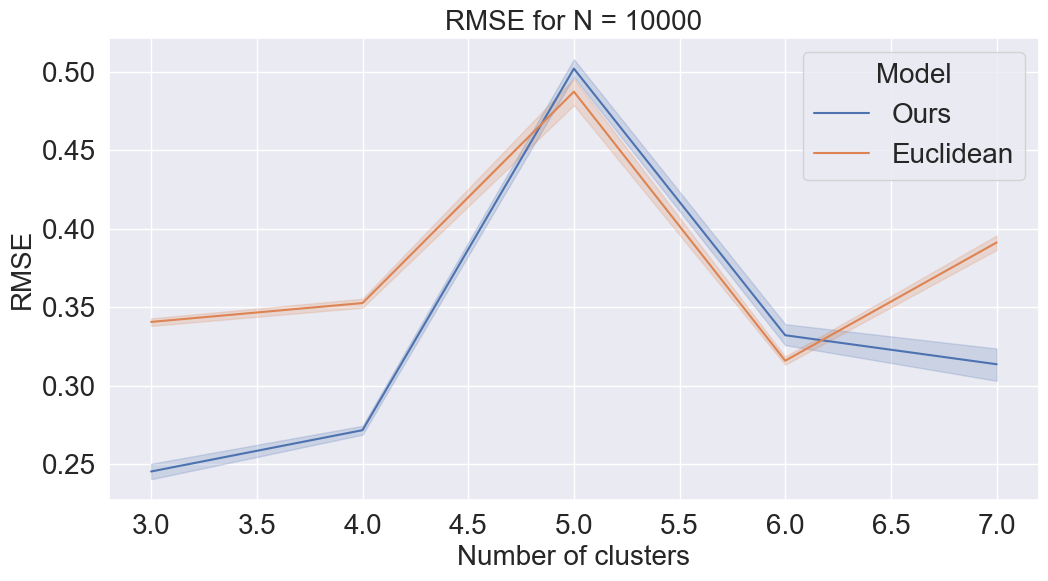

In [166]:
# Function to filter the DataFrame and plot the data
def plot_clusters(df, n, fontsize=20):
    # Exclude 'Entire' sample
    filtered_df = df[df['Sample'] != 'Entire']

    # Set all seaborn settings to default
    sns.set()

    # Plot the data
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=filtered_df, x='K', y='value', hue='Sample')
    plt.xlabel('Number of clusters', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.ylabel('RMSE', fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(title='Model', fontsize=fontsize, title_fontsize=fontsize)
    plt.title(f"RMSE for N = {n}", fontsize=fontsize)
    plt.show()

# Specify the number of training points
n = 10000

# Construct the dynamic variable name
variable_name = f"melted_rmse_df_{n}"

# Use exec to dynamically assign the DataFrame to a variable
exec(f"{variable_name} = melted_rmse_df_{n}")

# Dynamically retrieve the DataFrame using eval and plot
plot_clusters(eval(variable_name), n)

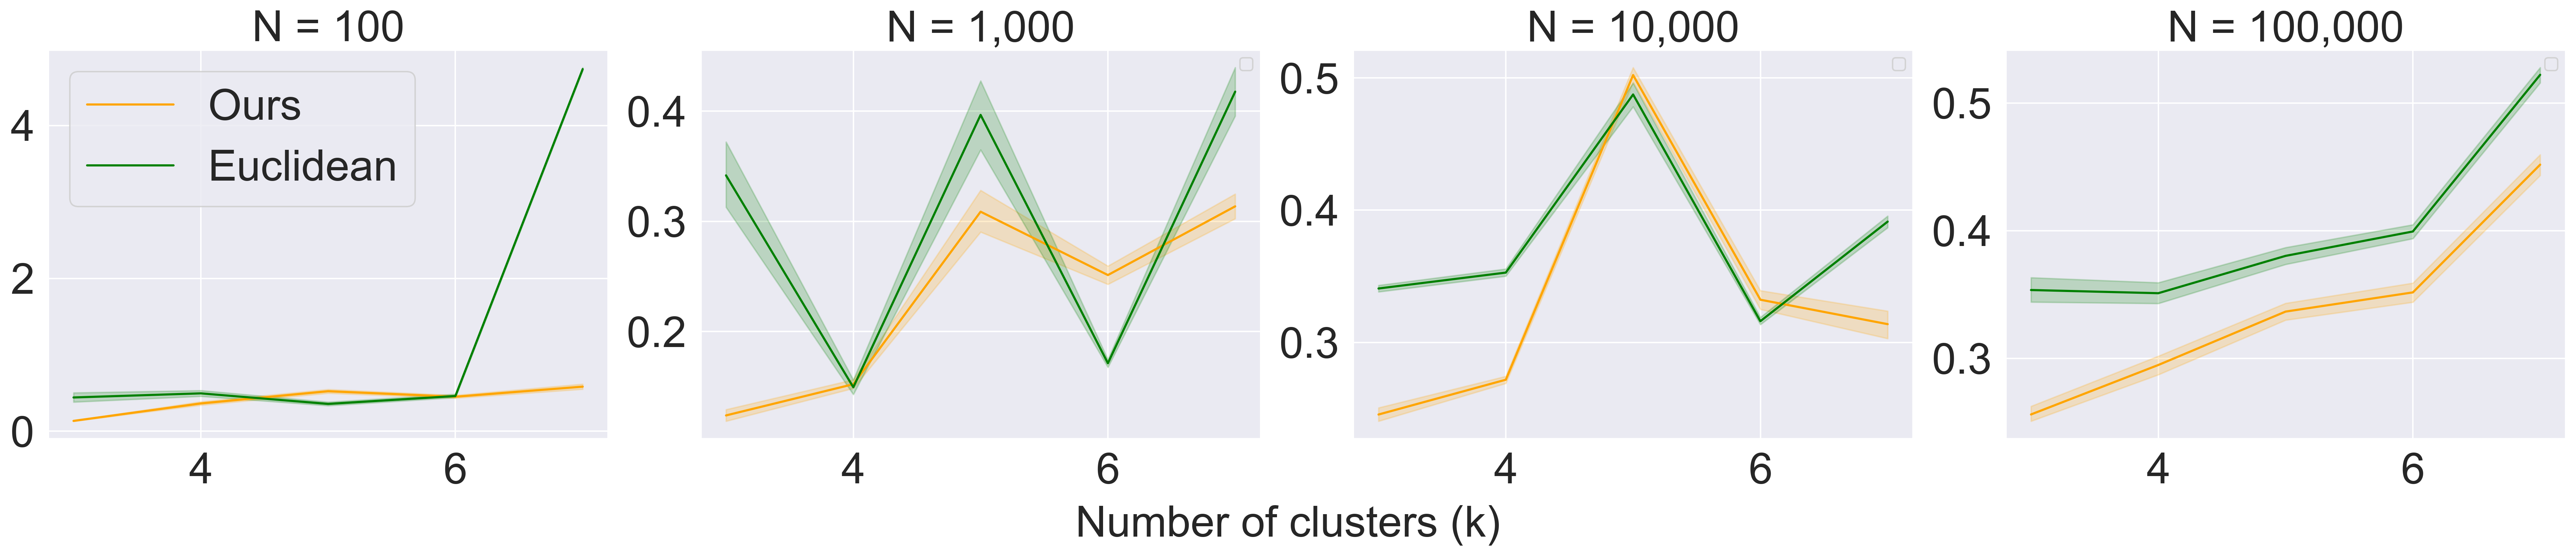

In [280]:
# Exclude 'Entire' sample
melted_rmse_df_clusters = melted_rmse_df[melted_rmse_df['Sample'] != 'Entire']
melted_rmse_df_clusters_100 = melted_rmse_df_clusters[melted_rmse_df_clusters['N'] == 100]
#melted_rmse_df_clusters_500 = melted_rmse_df_clusters[melted_rmse_df_clusters['N'] == 500]
melted_rmse_df_clusters_1000 = melted_rmse_df_clusters[melted_rmse_df_clusters['N'] == 1000]
#melted_rmse_df_clusters_5000 = melted_rmse_df_clusters[melted_rmse_df_clusters['N'] == 5000]
melted_rmse_df_clusters_10000 = melted_rmse_df_clusters[melted_rmse_df_clusters['N'] == 10000]
melted_rmse_df_clusters_100000 = melted_rmse_df_clusters[melted_rmse_df_clusters['N'] == 100000]

fontsize = 30

# Set all seaborn settings to default
sns.set()

# Make five figures horizontally side by side, make y log scale
fig, axs = plt.subplots(1, 4, figsize=(25, 5), dpi=300)

# Set x-axis label for the whole figure
fig.text(0.5, -0.05, 'Number of clusters (k)', ha='center', fontsize=fontsize)

# Plot the RMSE for N = 100
sns.lineplot(data=melted_rmse_df_clusters_100, x='K', y='value', hue='Sample', ax=axs[0], palette=colors)
axs[0].legend(fontsize=fontsize, title_fontsize=fontsize)
axs[0].set_ylabel('')
axs[0].set_xlabel('', fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize)
axs[0].tick_params(axis='y', labelsize=fontsize)
axs[0].set_title('N = 100', fontsize=fontsize)

# Plot the RMSE for N = 1000
sns.lineplot(data=melted_rmse_df_clusters_1000, x='K', y='value', hue='Sample', ax=axs[1], palette=colors)
axs[1].legend('')
axs[1].set_ylabel('')
axs[1].set_xlabel('', fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize)
axs[1].tick_params(axis='y', labelsize=fontsize)
axs[1].set_title('N = 1,000', fontsize=fontsize)

# Plot the RMSE for N = 10000
sns.lineplot(data=melted_rmse_df_clusters_10000, x='K', y='value', hue='Sample', ax=axs[2], palette=colors)
axs[2].set_ylabel('')
axs[2].set_xlabel('', fontsize=fontsize)
axs[2].tick_params(axis='x', labelsize=fontsize)
axs[2].tick_params(axis='y', labelsize=fontsize)
axs[2].legend('')
axs[2].set_title('N = 10,000', fontsize=fontsize)

# Plot the RMSE for N = 100000
sns.lineplot(data=melted_rmse_df_clusters_100000, x='K', y='value', hue='Sample', ax=axs[3], palette=colors)
axs[3].legend('')
axs[3].set_ylabel('')
axs[3].set_xlabel('', fontsize=fontsize)
axs[3].tick_params(axis='x', labelsize=fontsize)
axs[3].tick_params(axis='y', labelsize=fontsize)
axs[3].set_title('N = 100,000', fontsize=fontsize)

plt.tight_layout()
plt.show()

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=melted_rmse_df_clusters, x='K', y='value', hue='Sample')
# plt.xlabel('Number of clusters', fontsize=fontsize)
# plt.xticks(fontsize=fontsize)
# plt.ylabel('RMSE', fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.legend(title='Model', fontsize=fontsize, title_fontsize=fontsize)
# plt.show()

In [51]:
# Save results
results.to_csv('combined_results.csv', index=False)

# RMSE vs K LinePlot

In [52]:
melted_rmse_df_1000_cluster = melted_rmse_df_1000[melted_rmse_df_1000['Sample'] == 'Ours']
melted_rmse_df_1000_cluster_05 = melted_rmse_df_1000_cluster[melted_rmse_df_1000_cluster['Lambda'] == 0.5]
melted_rmse_df_1000_cluster_05_1 = melted_rmse_df_1000_cluster_05[melted_rmse_df_1000_cluster_05['Gamma'] == 1]

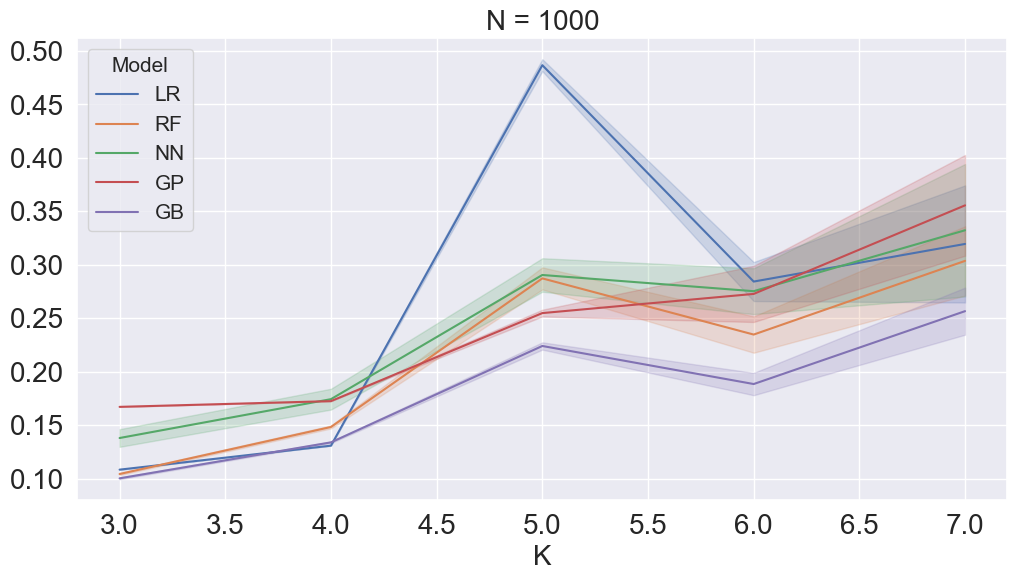

In [53]:
fontsize = 20

# Create the lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_rmse_df_1000_cluster, x="K", y="value", hue="Model", ci="sd")

# Set the labels and title
plt.xlabel("K", fontsize=fontsize)
plt.ylabel("", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(title="Model", fontsize=15, title_fontsize=15)
plt.title("N = 1000", fontsize=fontsize)

# Show the plot
plt.show()

# Train Runtime vs N

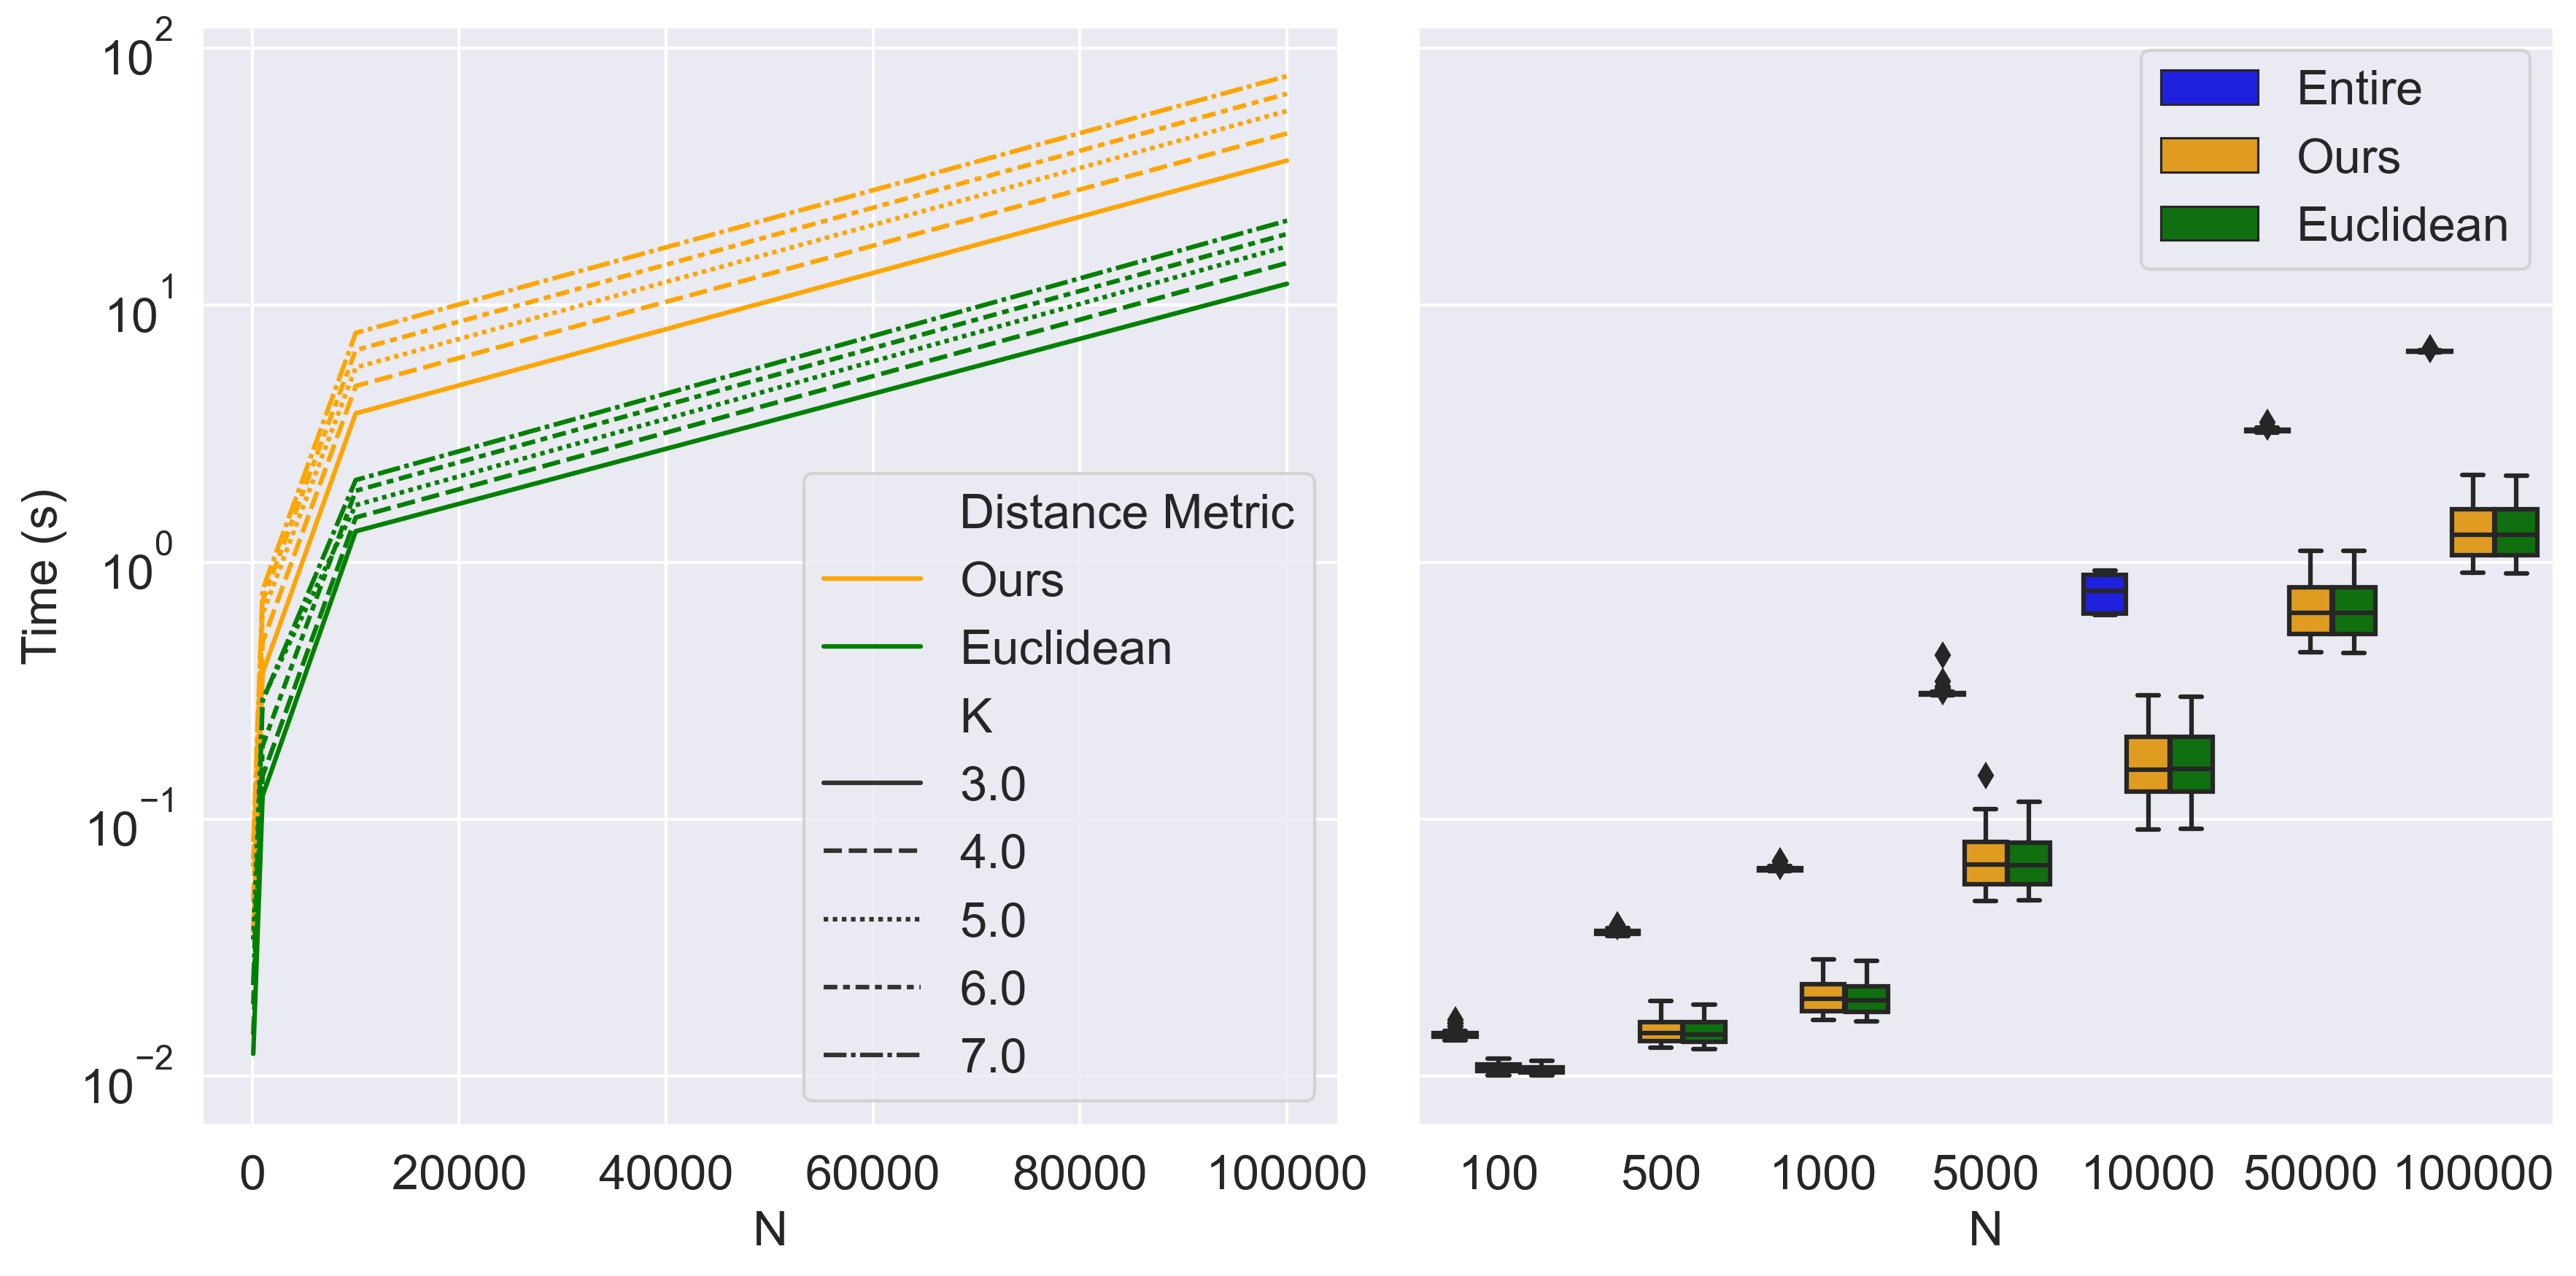

In [261]:
melted_times = pd.read_csv('times.csv')

melted_time_df_k3 = melted_time_df[melted_time_df['K'] == 3]
#melted_time_df_k3_clustered = melted_time_df[melted_time_df['Sample'] != 'Euclidean']
melted_time_df_k3_clustered_gp = melted_time_df_k3[melted_time_df_k3['Model'] == 'RF']

fontsize = 16
fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=300, sharey=True)

# On first subplot, plot the lineplot for melted_times
sns.lineplot(data=melted_times, x='N', y="Time (s)", hue="Distance Metric", style = "K", ax=axs[0], palette=colors)
axs[0].set_yscale('log')
axs[0].set_xlabel('N', fontsize=fontsize)
axs[0].set_ylabel('Time (s)', fontsize=fontsize)
axs[0].legend(fontsize=fontsize, title_fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize)
axs[0].tick_params(axis='y', labelsize=fontsize)

# On second subplot, plot the barplot for melted_time_df_k3_clustered_gp
sns.boxplot(data=melted_time_df[melted_time_df['Model'] == 'GB'], x='N', y='value', hue='Sample', ax=axs[1], palette=colors)
# Make y log scale
axs[1].set_yscale('log')
axs[1].set_xlabel('N', fontsize=fontsize)
axs[1].set_ylabel('', fontsize=fontsize)
axs[1].legend(fontsize=fontsize, title_fontsize=fontsize)
# Display x-ticks in scientific notation
axs[1].tick_params(axis='x', labelsize=fontsize)
axs[1].tick_params(axis='y', labelsize=fontsize)


# Make compact
plt.tight_layout()

In [ ]:
sns.

# Norm vs RMSE

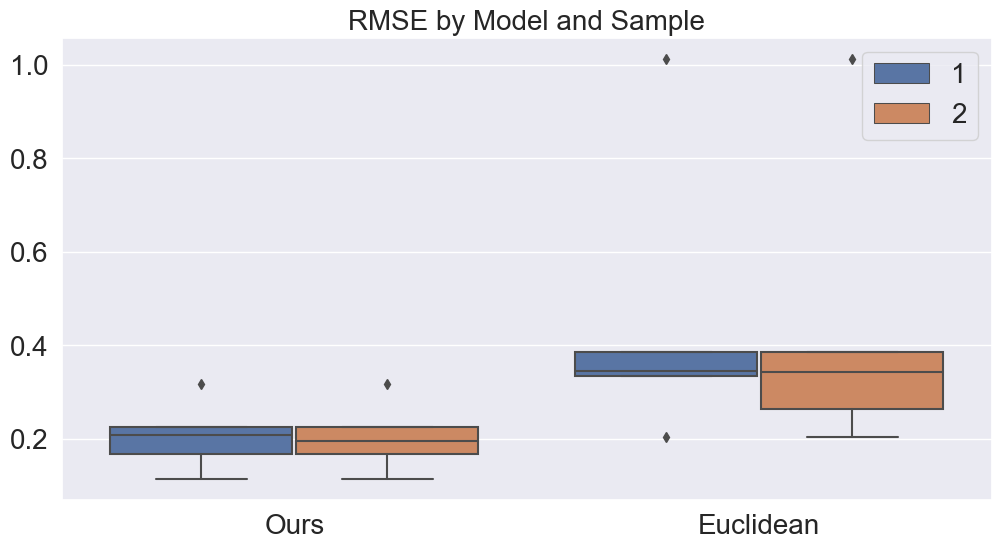

In [36]:
fontsize = 20
melted_rmse_df_clusters = melted_rmse_df[melted_rmse_df['Sample'] != 'Entire']
melted_rmse_df_clusters_nn = melted_rmse_df_clusters[melted_rmse_df_clusters['Model'] == 'GP']
melted_rmse_df_clusters_nn_k3 = melted_rmse_df_clusters_nn[melted_rmse_df_clusters_nn['K'] == 3]
melted_rmse_df_clusters_nn_k3_05 = melted_rmse_df_clusters_nn_k3[melted_rmse_df_clusters_nn_k3['Lambda'] == 0.5]
melted_rmse_df_clusters_nn_k3_05_1 = melted_rmse_df_clusters_nn_k3_05[melted_rmse_df_clusters_nn_k3_05['Gamma'] == 1]

# Set the desired order of models
model_order = ['LR', 'NN', 'GP', 'RF', 'GB']

# Convert 'Model' column to a categorical type with the specified order
melted_rmse_df_clusters_nn_k3_05_1['Model'] = pd.Categorical(melted_rmse_df_clusters_nn_k3_05_1['Model'], categories=model_order, ordered=True)

sns.set()
# Set default color palette
plt.figure(figsize=(12, 6))
# Create the line plot
sns.boxplot(data=melted_rmse_df_clusters_nn_k3_05_1, x='Sample', y='value', hue='Norm')

# Set the title and labels
plt.title('RMSE by Model and Sample', fontsize=fontsize)
plt.ylabel('', fontsize=fontsize)
plt.xlabel('', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, title_fontsize=fontsize)

# Show the plot
plt.show()



In [408]:
melted_rmse_df_clusters_nn

N  Norm  Lambda  Gamma  K      value Model     Sample
18900  10000     2     0.5    0.5  6   0.247949    GP       Ours
18901   5000     1     0.9    1.0  5   0.301816    GP       Ours
18902   1000     1     0.1    0.5  4   0.339815    GP       Ours
18903    100     1     0.1    1.0  7   0.336907    GP       Ours
18904  10000     1     0.5    0.5  3   0.194299    GP       Ours
...      ...   ...     ...    ... ..        ...   ...        ...
28345  10000     2     0.1    1.0  6   0.427928    GP  Euclidean
28346    100     1     0.5    0.5  7  15.994486    GP  Euclidean
28347  10000     1     0.1    1.0  3   0.155920    GP  Euclidean
28348   1000     1     0.9    2.0  4   4.051123    GP  Euclidean
28349    500     2     0.5    0.5  7   5.711050    GP  Euclidean

[1800 rows x 8 columns]